# import needed libraries

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC


# Plot function code

In [ ]:
def plot_learning_curves(model, x, y, title):
    train_sizes, train_scores, val_scores = learning_curve(model, x, y, cv=3, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))#, shuffle=True, random_state=42

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training Size")
    plt.ylabel("accuracy")
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

# Approach 1: Reference Approach

Reading the data

In [8]:
# Load the data
file_path = 'data.csv'
data = pd.read_csv(file_path)

# Assume 'target_column_name' is your categorical target; replace it with your actual column name
target_column_name = 'cancer_type'  # Replace 'cancer_type' with your actual target column

# Encode categorical variables, including the target if it's not numerically categorical
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

# Impute missing values for all columns
imputer = SimpleImputer(strategy='most_frequent')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Normalize only the feature data, exclude target
feature_columns = [col for col in data.columns if col != target_column_name]
scaler = StandardScaler()
data[feature_columns] = scaler.fit_transform(data[feature_columns])

# Split the data
X = data[feature_columns]
y = data[target_column_name].astype(int)  # Ensure the target is treated as an integer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test,X_val,y_test,y_val= train_test_split(X_test, y_test, test_size=0.5, random_state=42)

C:\Users\student\AppData\Local\Temp/ipykernel_5712/1549418061.py:3: DtypeWarning: Columns (662,664,676,677,683,685,686,687) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Size of data and each type cancer

In [4]:
X_train.shape

(1196, 687)

In [5]:
dict_number_of_each_type={}
for i in y:
    if i not in dict_number_of_each_type:
        dict_number_of_each_type[i]=1
    else:
        dict_number_of_each_type[i]+=1
print(dict_number_of_each_type)
print("cancer type1 %", dict_number_of_each_type[0]/len(y)*100)
print("cancer type2 %", dict_number_of_each_type[1]/len(y)*100)
print("cancer type3 %", dict_number_of_each_type[2]/len(y)*100)
print("cancer type4 %", dict_number_of_each_type[3]/len(y)*100)



{0: 1199, 1: 114, 3: 165, 2: 18}
cancer type1 % 80.14705882352942
cancer type2 % 7.620320855614973
cancer type3 % 1.2032085561497325
cancer type4 % 11.029411764705882


As the above percentage shows the dataset is imbalanced which implies that relying only accuracy as an evaluation metric is
not a feasible way, especially that it might exhibit misleading mortrayal of the model’s performance, effectiveness and effi-
ciency. Therefore, it is crucial to incorporate additional metrics that account for class imbalance, such as the F1 score.
For this purpose, we use the weighted F1 score as an second  metric to evaluate the performance of our machine learning model. 

logistic regression Model for reference Approach

In [11]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred = logistic_model.predict(X_val)

# Evaluate the model on the validation data
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')
f1_macro = f1_score(y_val, y_pred,average='macro')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score_weighted: ", f1)
print("f1_score_macro: ", f1_macro)

print("Classification Report:\n", report)

Accuracy: 0.7
f1_score_weighted:  0.6987522281639927
f1_score_macro:  0.35695187165775394
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82       117
           1       0.75      0.43      0.55        14
           2       0.00      0.00      0.00         5
           3       0.05      0.07      0.06        14

    accuracy                           0.70       150
   macro avg       0.40      0.33      0.36       150
weighted avg       0.71      0.70      0.70       150



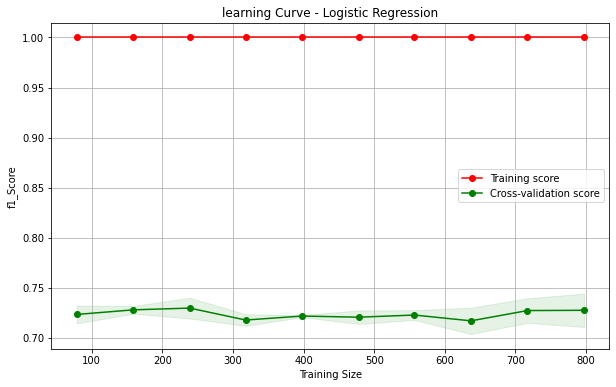

In [12]:
plot_learning_curves(logistic_model, X_train, y_train, "learning Curve - Logistic Regression")

In [13]:
param_grid_logistic = {
    'C': [0.01, 0.1 ],
    'penalty': ['l1','l2'],
    'solver': ['liblinear', 'saga']  # 'liblinear' and 'saga' support 'l1' and 'l2' penalties
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid_logistic, cv=5, scoring='f1_weighted', verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters found:", grid_search.best_params_)

# Best model obtained from GridSearch
best_model = grid_search.best_estimator_

# Predict using the best model
y_pred = best_model.predict(X_val)

# Evaluate the best model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')
f1_macro = f1_score(y_val, y_pred,average='macro')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score_weighted: ", f1)
print("f1_score_macro: ", f1_macro)

print("Classification Report:\n", report)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters found: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Accuracy: 0.78
f1_score_weighted:  0.7151111111111111
f1_score_macro:  0.30256410256410254
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.97      0.88       117
           1       0.75      0.21      0.33        14
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        14

    accuracy                           0.78       150
   macro avg       0.39      0.30      0.30       150
weighted avg       0.69      0.78      0.72       150



c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

Random Forest Model for reference approach: 

In [17]:

# Initialize and train the Random Forest Classifier
Random_forest_model = RandomForestClassifier()
Random_forest_model.fit(X_train, y_train)

# Make predictions
y_pred = Random_forest_model.predict(X_val)

# Evaluate the model using accuracy and Weighed F1 score
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')
f1_macro = f1_score(y_val, y_pred,average='macro')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score_weighted: ", f1)
print("f1_score_macro: ", f1_macro)

print("Classification Report:\n", report)

Accuracy: 0.78
f1_score_weighted:  0.6835955056179776
f1_score_macro:  0.21910112359550563
Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88       117
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        14

    accuracy                           0.78       150
   macro avg       0.20      0.25      0.22       150
weighted avg       0.61      0.78      0.68       150



c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

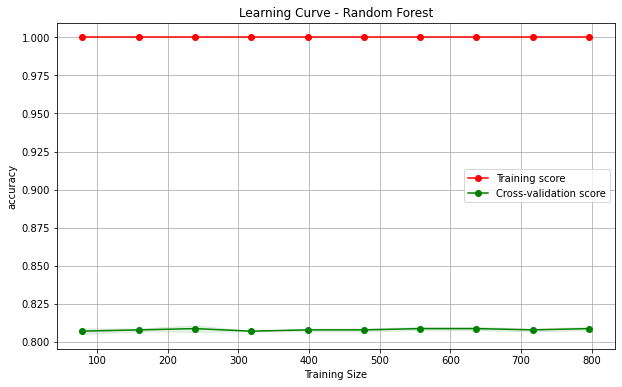

In [18]:
plot_learning_curves(Random_forest_model, X_train, y_train, "Learning Curve - Random Forest")

In [19]:
# Define a parameter grid to search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 8, 10],
    'min_samples_split': [2, 5, 10]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Use the best model for prediction
y_pred = best_model.predict(X_val)

# Evaluate the model on the validation data
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')
f1_macro = f1_score(y_val, y_pred,average='macro')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score_weighted: ", f1)
print("f1_score_macro: ", f1_macro)

print("Classification Report:\n", report)

Best Parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.78
f1_score_weighted:  0.6835955056179776
f1_score_macro:  0.21910112359550563
Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88       117
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        14

    accuracy                           0.78       150
   macro avg       0.20      0.25      0.22       150
weighted avg       0.61      0.78      0.68       150



c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

Decision Tree Model for reference approach :

In [20]:

# Initialize and train the Decision Tree Classifier
Decision_tree_model = DecisionTreeClassifier(random_state=42)
Decision_tree_model.fit(X_train, y_train)

# Make predictions
y_pred = Decision_tree_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')
f1_macro = f1_score(y_val, y_pred,average='macro')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score_weighted: ", f1)
print("f1_score_macro: ", f1_macro)

print("Classification Report:\n", report)

Accuracy: 0.7133333333333334
f1_score_weighted:  0.698395061728395
f1_score_macro:  0.33796296296296297
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       117
           1       0.38      0.36      0.37        14
           2       0.00      0.00      0.00         5
           3       0.15      0.14      0.15        14

    accuracy                           0.71       150
   macro avg       0.34      0.34      0.34       150
weighted avg       0.68      0.71      0.70       150



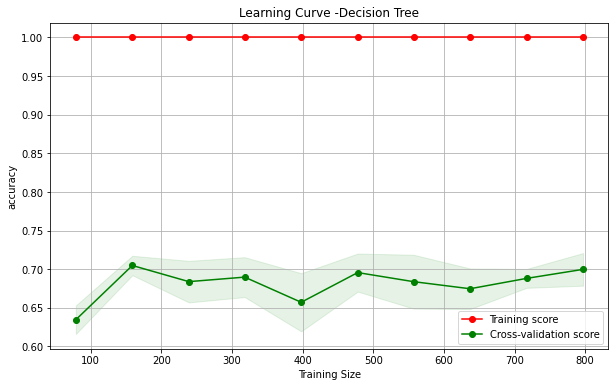

In [21]:
plot_learning_curves(Decision_tree_model, X_train, y_train, "Learning Curve -Decision Tree")

In [ ]:
param_grid = {
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

# Setup the grid search
grid_search = GridSearchCV(estimator=Decision_tree_model, param_grid=param_grid, cv=5, scoring='f1_weighted', verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)


# Get the best model from the grid search
best_dtree = grid_search.best_estimator_
print("Best parameters found:", grid_search.best_params_)

# Predictions using the best model
y_pred = best_dtree.predict(X_val)

# Evaluate the best model on the validation data
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')
f1_macro = f1_score(y_val, y_pred,average='macro')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score_weighted: ", f1)
print("f1_score_macro: ", f1_macro)

print("Classification Report:\n", report)

SVM Model for reference approach

In [23]:
#define svm model and train it with train data
svm_model = SVC()  #define svm model 
svm_model.fit(X_train, y_train)

# Make predictions for validation data set
y_pred = svm_model.predict(X_val)

# Evaluate the model for validation data set
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')
f1_macro = f1_score(y_val, y_pred,average='macro')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score_weighted: ", f1)
print("f1_score_macro: ", f1_macro)

print("Classification Report:\n", report)

Accuracy: 0.78
f1_score_weighted:  0.6835955056179776
f1_score_macro:  0.21910112359550563
Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88       117
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        14

    accuracy                           0.78       150
   macro avg       0.20      0.25      0.22       150
weighted avg       0.61      0.78      0.68       150



c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

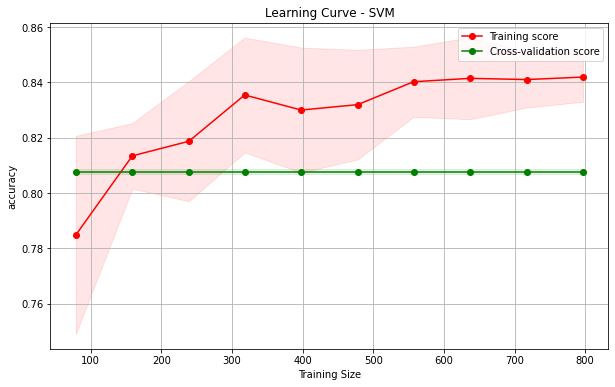

In [24]:
plot_learning_curves(svm_model, X_train, y_train, "Learning Curve - SVM")

In [25]:
param_grid = {
    'C': [ 1, 5,10,15],
    'kernel': ['linear', 'rbf', ],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'degree': [2,4,6]  # Only really applies if kernel is 'poly'
}
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='f1_weighted', verbose=1, n_jobs=-1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters found:", grid_search.best_params_)

# Best model obtained from grid search
best_svm = grid_search.best_estimator_

# Predict using the best model
y_pred = best_svm.predict(X_val)

# Evaluate the best model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')
f1_macro = f1_score(y_val, y_pred,average='macro')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score_weighted: ", f1)
print("f1_score_macro: ", f1_macro)

print("Classification Report:\n", report)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


Best parameters found: {'C': 10, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
Accuracy: 0.7866666666666666
f1_score_weighted:  0.7202974983096686
f1_score_macro:  0.30854180752760874
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.98      0.88       117
           1       1.00      0.21      0.35        14
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        14

    accuracy                           0.79       150
   macro avg       0.45      0.30      0.31       150
weighted avg       0.72      0.79      0.72       150



c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

Gradient Boosting for reference approach

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

#define gradient boost
gb_clf = GradientBoostingClassifier(random_state=42)

# Fit the model on the training data
gb_clf.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = gb_clf.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')
f1_macro = f1_score(y_val, y_pred,average='macro')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score_weighted: ", f1)
print("f1_score_macro: ", f1_macro)

print("Classification Report:\n", report)

Accuracy: 0.7933333333333333
f1_score_weighted:  0.739502840909091
f1_score_macro:  0.35706676136363635
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.97      0.88       117
           1       0.75      0.43      0.55        14
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        14

    accuracy                           0.79       150
   macro avg       0.39      0.35      0.36       150
weighted avg       0.70      0.79      0.74       150



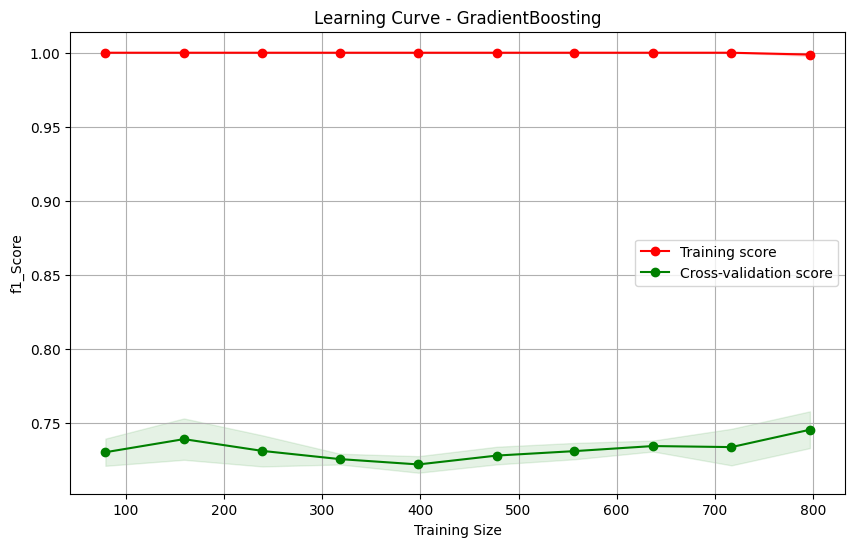

In [ ]:
plot_learning_curves(gb_clf, X_train, y_train, "Learning Curve - GradientBoosting")

In [27]:
param_grid = {
    'n_estimators': [ 20, 50,100,200],
    'learning_rate': [0.01,0.1,1],
    'max_depth': [3, 6,9],
    'min_samples_split': [2,4,6],

}

# Use GridSearch
cv_gb = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=3, scoring='f1_weighted', verbose=1, n_jobs=-1)

# Fit the grid search model
cv_gb.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", cv_gb.best_params_)
print("Best accuracy found: ", cv_gb.best_score_)

# Evaluate the best model
best_gb = cv_gb.best_estimator_
y_pred = best_gb.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')
f1_macro = f1_score(y_val, y_pred,average='macro')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score_weighted: ", f1)
print("f1_score_macro: ", f1_macro)

print("Classification Report:\n", report)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


Best parameters found:  {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 200}
Best accuracy found:  0.7333139261665088
Accuracy: 0.8
f1_score_weighted:  0.7344444444444443
f1_score_macro:  0.34020146520146516
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.98      0.88       117
           1       0.71      0.36      0.48        14
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        14

    accuracy                           0.80       150
   macro avg       0.38      0.34      0.34       150
weighted avg       0.69      0.80      0.73       150



c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

# xg Boost 

In [28]:
# Initialize and train the XGBoost classifier
xgBoost_model = xgb.XGBClassifier()
xgBoost_model.fit(X_train, y_train)

# Make predictions
y_pred = xgBoost_model.predict(X_val)

# Evaluate the model validation test
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')
f1_macro = f1_score(y_val, y_pred,average='macro')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score_weighted: ", f1)
print("f1_score_macro: ", f1_macro)

print("Classification Report:\n", report)

Accuracy: 0.82
f1_score_weighted:  0.7553103448275863
f1_score_macro:  0.3741379310344828
Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.90       117
           1       1.00      0.43      0.60        14
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        14

    accuracy                           0.82       150
   macro avg       0.45      0.36      0.37       150
weighted avg       0.73      0.82      0.76       150



c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

C:\Users\Legend\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
2 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Legend\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Legend\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py", line 730, in inner_f
    return func(**kwargs)
  File "C:\Users\Legend\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py", line 1471, in fit
    raise ValueError(
ValueErr

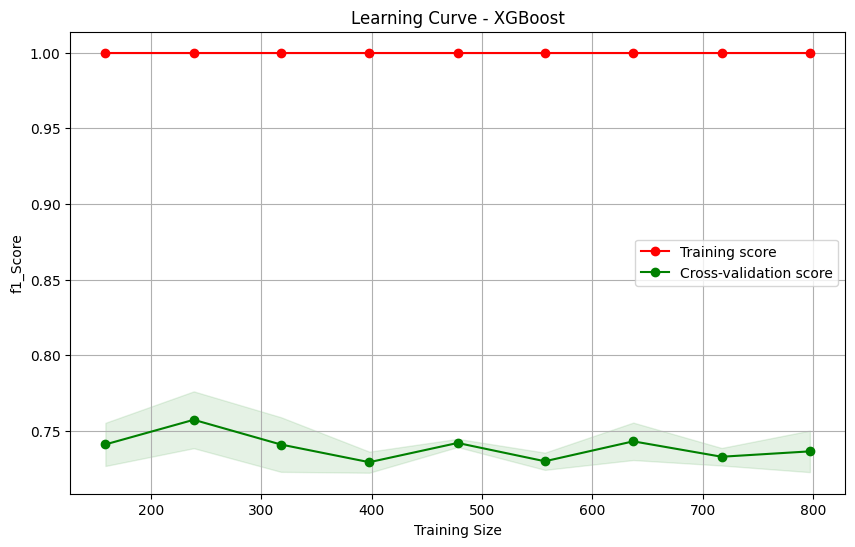

In [ ]:
plot_learning_curves(xgBoost_model, X_train, y_train, "Learning Curve - XGBoost")

In [29]:
#drfine paramter to fine tune
param_grid = {
    'learning_rate': [0.001, 0.01,0.1,1 ],
    'max_depth': [3, 6,9],
    'n_estimators': [ 50,100,200],
     'gamma': [ 0.1, 1 ],

}

#fit the data on training
grid_search = GridSearchCV(estimator=xgBoost_model, param_grid=param_grid, cv=3, scoring='f1_weighted', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
#find best model
best_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")
# pridict the value on validation dataset 
y_pred = best_model.predict(X_val)  

#calculate the matrices
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')
f1_macro = f1_score(y_val, y_pred,average='macro')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score_weighted: ", f1)
print("f1_score_macro: ", f1_macro)

print("Classification Report:\n", report)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters: {'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 200}
Accuracy: 0.8133333333333334
f1_score_weighted:  0.7547427766032416
f1_score_macro:  0.38195912614517263
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.98      0.89       117
           1       0.88      0.50      0.64        14
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        14

    accuracy                           0.81       150
   macro avg       0.42      0.37      0.38       150
weighted avg       0.72      0.81      0.75       150



c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

KNN Neighbor for reference approach

In [30]:

k = 5  # Number of neighbors
#train the data on k neighbor 
KNN_model = KNeighborsClassifier(n_neighbors=k)
KNN_model.fit(X_train, y_train)

# Make predictions
y_pred = KNN_model.predict(X_val)

# Evaluate the model on validation data
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')
f1_macro = f1_score(y_val, y_pred,average='macro')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score_weighted: ", f1)
print("f1_score_macro: ", f1_macro)

print("Classification Report:\n", report)

c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

Accuracy: 0.7666666666666667
f1_score_weighted:  0.6795454545454547
f1_score_macro:  0.21780303030303033
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.98      0.87       117
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        14

    accuracy                           0.77       150
   macro avg       0.20      0.25      0.22       150
weighted avg       0.61      0.77      0.68       150



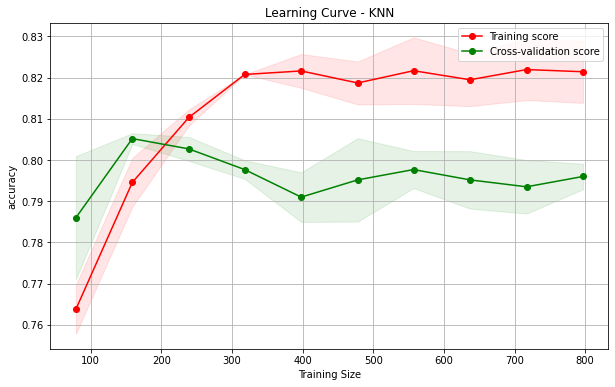

In [31]:
plot_learning_curves(KNN_model, X_train, y_train, "Learning Curve - KNN")

In [32]:
#parameter to fine tune model
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],  # Distance metric
}

# Initialize the K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()

# Setup the grid search with cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters found:", grid_search.best_params_)

# Best model obtained from grid search
best_knn = grid_search.best_estimator_

# Predict using the best model
y_pred = best_knn.predict(X_val)

# Evaluate the best model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')
f1_macro = f1_score(y_val, y_pred,average='macro')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score_weighted: ", f1)
print("f1_score_macro: ", f1_macro)

print("Classification Report:\n", report)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best parameters found: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
Accuracy: 0.78
f1_score_weighted:  0.6835955056179776
f1_score_macro:  0.21910112359550563
Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88       117
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        14

    accuracy                           0.78       150
   macro avg       0.20      0.25      0.22       150
weighted avg       0.61      0.78      0.68       150



c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

LightGBM for reference approach

In [33]:
# Initialize and train the LightGBM model
params = {
    'objective': 'binary',  # For binary classification
    'metric': 'binary_error'  # Metric to optimize
}

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_val, label=y_val)

num_round = 100  # Number of boosting rounds
lgb_model = lgb.train(params, train_data, num_round, valid_sets=[test_data])

# Make predictions
y_pred = lgb_model.predict(X_val)
y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]  # Convert probabilities to binary predictions

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred_binary)
f1 = f1_score(y_val, y_pred_binary,average='weighted')
f1_macro = f1_score(y_val, y_pred_binary,average='macro')

report = classification_report(y_val, y_pred_binary)

print("Accuracy:", accuracy)
print("f1_score_weighted: ", f1)
print("f1_score_macro: ", f1_macro)
print("Classification Report:\n", report)

[LightGBM] [Info] Number of positive: 230, number of negative: 966
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027161 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 127549
[LightGBM] [Info] Number of data points in the train set: 1196, number of used features: 601
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.192308 -> initscore=-1.435085
[LightGBM] [Info] Start training from score -1.435085
Accuracy: 0.8
f1_score_weighted:  0.7379979777553083
f1_score_macro:  0.35136501516683516
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.97      0.88       117
           1       0.67      0.43      0.52        14
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        14

    accuracy                           0.80       150
   macro avg       0.37      0.35      0.35       150
weighted avg  

c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [34]:
#parameter to fine tune the model
param_grid_lgb = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [50, 100, 200],
    'max_depth': [5],
    # 'num_leaves': [31, 63, 127],
}
#define lightgbm model
lgb_model = lgb.LGBMClassifier()

# Setup the grid search with cross-validation
grid_search_lgb = GridSearchCV(estimator=lgb_model, param_grid=param_grid_lgb, cv=5, scoring='f1_weighted', verbose=1, n_jobs=-1)

# Fit grid search
grid_search_lgb.fit(X_train, y_train)

# Best parameters found
print("Best parameters found for LightGBM:", grid_search_lgb.best_params_)

# Best model obtained from grid search
best_lgb = grid_search_lgb.best_estimator_

# Predict using the best model
y_pred = best_lgb.predict(X_val)

# Evaluate the best model

accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')
f1_macro = f1_score(y_val, y_pred,average='macro')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score_weighted: ", f1)
print("f1_score_macro: ", f1_macro)

print("Classification Report:\n", report)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023737 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 127549
[LightGBM] [Info] Number of data points in the train set: 1196, number of used features: 601
[LightGBM] [Info] Start training from score -0.213574
[LightGBM] [Info] Start training from score -2.609401
[LightGBM] [Info] Start training from score -4.688843
[LightGBM] [Info] Start training from score -2.211541
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

Naive Bayes for reference approach

In [35]:
#define naive bayes model
NN_model = GaussianNB()
NN_model.fit(X_train, y_train)

# Make predictions
y_pred = NN_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')
f1_macro = f1_score(y_val, y_pred,average='macro')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score_weighted: ", f1)
print("f1_score_macro: ", f1_macro)

print("Classification Report:\n", report)

Accuracy: 0.26666666666666666
f1_score_weighted:  0.30853852813852817
f1_score_macro:  0.18882343846629562
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.22      0.35       117
           1       0.12      0.64      0.20        14
           2       0.00      0.00      0.00         5
           3       0.14      0.36      0.20        14

    accuracy                           0.27       150
   macro avg       0.26      0.31      0.19       150
weighted avg       0.64      0.27      0.31       150



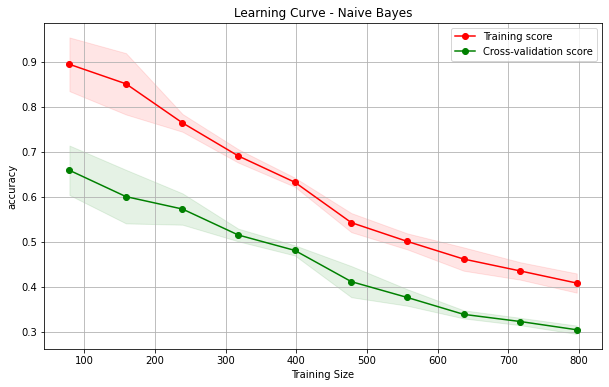

In [36]:
plot_learning_curves(NN_model, X_train, y_train, "Learning Curve - Naive Bayes")

Neural Network for reference approach

In [37]:

# Define the neural network model
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the val set
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f'Val Accuracy: {test_accuracy:.2f}, validation Loss: {test_loss:.2f}')


Epoch 1/50


c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\data_adapter.py:1798: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


30/30 [==============================] - 1s 10ms/step - loss: 0.7092 - accuracy: 0.5753 - val_loss: 0.7653 - val_accuracy: 0.5417
Epoch 2/50
30/30 [==============================] - 0s 4ms/step - loss: -0.5691 - accuracy: 0.6213 - val_loss: 1.7813 - val_accuracy: 0.5167
Epoch 3/50
30/30 [==============================] - 0s 4ms/step - loss: -11.8690 - accuracy: 0.6475 - val_loss: 19.7270 - val_accuracy: 0.4833
Epoch 4/50
30/30 [==============================] - 0s 4ms/step - loss: -136.0192 - accuracy: 0.6506 - val_loss: 95.1394 - val_accuracy: 0.5667
Epoch 5/50
30/30 [==============================] - 0s 4ms/step - loss: -823.4832 - accuracy: 0.6977 - val_loss: 578.8879 - val_accuracy: 0.5083
Epoch 6/50
30/30 [==============================] - 0s 4ms/step - loss: -2927.3274 - accuracy: 0.6715 - val_loss: 1221.9905 - val_accuracy: 0.5000
Epoch 7/50
30/30 [==============================] - 0s 4ms/step - loss: -8034.1455 - accuracy: 0.7249 - val_loss: 3208.3015 - val_accuracy: 0.4958
Epo

In [38]:
# define model
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Callback for early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f'validation Accuracy: {test_accuracy:.2f}, Validation loss: {test_loss:.2f}')

c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\data_adapter.py:1798: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/100
30/30 [==============================] - 3s 16ms/step - loss: 0.9386 - accuracy: 0.4718 - val_loss: 0.5667 - val_accuracy: 0.5833
Epoch 2/100
30/30 [==============================] - 0s 7ms/step - loss: 0.6341 - accuracy: 0.4948 - val_loss: 0.5408 - val_accuracy: 0.5375
Epoch 3/100
30/30 [==============================] - 0s 6ms/step - loss: 0.5753 - accuracy: 0.5136 - val_loss: 0.5665 - val_accuracy: 0.5250
Epoch 4/100
30/30 [==============================] - 0s 6ms/step - loss: 0.4912 - accuracy: 0.5314 - val_loss: 0.5774 - val_accuracy: 0.5125
Epoch 5/100
30/30 [==============================] - 0s 5ms/step - loss: 0.3482 - accuracy: 0.5649 - val_loss: 0.5649 - val_accuracy: 0.5417
Epoch 6/100
30/30 [==============================] - 0s 5ms/step - loss: 0.3411 - accuracy: 0.5764 - val_loss: 0.5464 - val_accuracy: 0.5333
Epoch 7/100
30/30 [==============================] - 0s 8ms/step - loss: 0.2539 - accuracy: 0.5973 - val_loss: 0.5437 - val_accuracy: 0.5333
Epoch 8/100


# Approach 2: PCA

Reading the Data with PCA 

In [39]:
file_path = 'data.csv'
data = pd.read_csv(file_path)

# Assume 'target_column_name' is your categorical target; replace it with your actual column name
target_column_name = 'cancer_type'  # Replace 'cancer_type' with your actual target column

# Encode categorical variables, including the target if it's not numerically categorical
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

# Impute missing values for all columns
imputer = SimpleImputer(strategy='most_frequent')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Normalize only the feature data, exclude target
feature_columns = [col for col in data.columns if col != target_column_name]
scaler = StandardScaler()
data[feature_columns] = scaler.fit_transform(data[feature_columns])

# Split the data
X = data[feature_columns]
y = data[target_column_name].astype(int)  # Ensure the target is treated as an integer


# Apply PCA
pca = PCA(n_components=2)  # compress the features in 2 components
X_pca = pca.fit_transform(X)

# Split data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test,X_val,y_test,y_val= train_test_split(X_test, y_test, test_size=0.5, random_state=42)

C:\Users\student\AppData\Local\Temp/ipykernel_5712/3252328926.py:2: DtypeWarning: Columns (662,664,676,677,683,685,686,687) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Logistic regression with PCA

In [42]:


# Initialize and train the Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val,  y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score: ", f1)
print("Classification Report:\n", report)

Accuracy: 0.7
f1_score:  0.6987522281639927
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82       117
           1       0.75      0.43      0.55        14
           2       0.00      0.00      0.00         5
           3       0.05      0.07      0.06        14

    accuracy                           0.70       150
   macro avg       0.40      0.33      0.36       150
weighted avg       0.71      0.70      0.70       150



c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

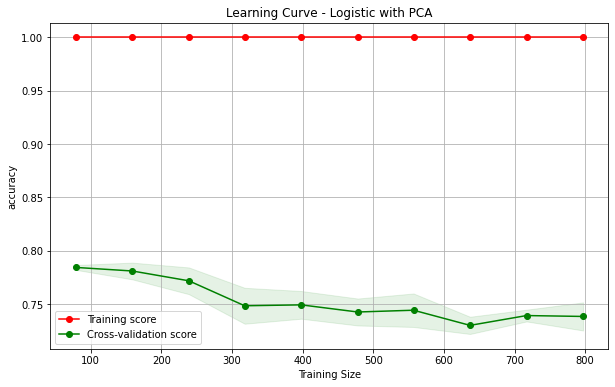

In [43]:
plot_learning_curves(model, X_train, y_train, "Learning Curve - Logistic with PCA")

In [44]:
#parameter to fine tune data
param_grid = {
    'C': [0.01, 0.1,0.001 ,1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # 'liblinear' and 'saga' support 'l1' and 'l2' penalties
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1_weighted', verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters found:", grid_search.best_params_)

# Best model obtained from GridSearch
best_model = grid_search.best_estimator_

# Predict using the best model
y_pred = best_model.predict(X_val)

# Evaluate the best model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score: Weighted ", f1)
print("Classification Report:\n", report)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means

Best parameters found: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
Accuracy: 0.7666666666666667
f1_score: Weighted  0.7264016563146998
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87       117
           1       0.67      0.29      0.40        14
           2       0.00      0.00      0.00         5
           3       0.11      0.07      0.09        14

    accuracy                           0.77       150
   macro avg       0.40      0.32      0.34       150
weighted avg       0.71      0.77      0.73       150



c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classifi

Random Forest with PCA

In [45]:

# Initialize and train the Random Forest Classifier
Random_forest_model = RandomForestClassifier()
Random_forest_model.fit(X_train, y_train)

# Make predictions
y_pred = Random_forest_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score_weighted: ", f1)
print("Classification Report:\n", report)

Accuracy: 0.78
f1_score_weighted:  0.6835955056179776
Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88       117
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        14

    accuracy                           0.78       150
   macro avg       0.20      0.25      0.22       150
weighted avg       0.61      0.78      0.68       150



c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

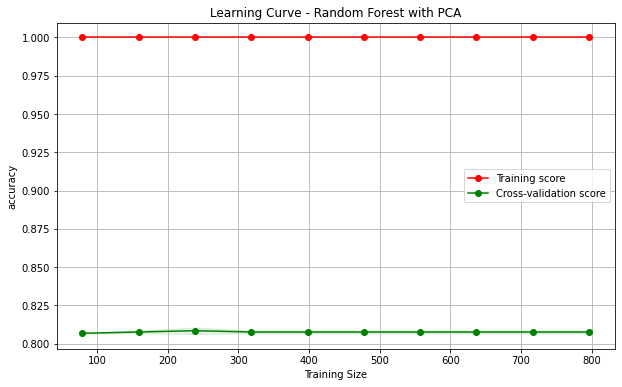

In [46]:
plot_learning_curves(Random_forest_model, X_train, y_train, "Learning Curve - Random Forest with PCA")

In [47]:
# Define a parameter grid to search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 8, 10],
    'min_samples_split': [2, 5, 10]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Use the best model for prediction
y_pred = best_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score_weighted: ", f1)
print("Classification Report:\n", report)

Best Parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.78
f1_score_weighted:  0.6835955056179776
Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88       117
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        14

    accuracy                           0.78       150
   macro avg       0.20      0.25      0.22       150
weighted avg       0.61      0.78      0.68       150



c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

Decision Tree with PCA: 

In [48]:
Decision_tree_model = DecisionTreeClassifier(random_state=42)
Decision_tree_model.fit(X_train, y_train)

# Make predictions
y_pred = Decision_tree_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score: ", f1)
print("Classification Report:\n", report)

Accuracy: 0.7133333333333334
f1_score:  0.698395061728395
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       117
           1       0.38      0.36      0.37        14
           2       0.00      0.00      0.00         5
           3       0.15      0.14      0.15        14

    accuracy                           0.71       150
   macro avg       0.34      0.34      0.34       150
weighted avg       0.68      0.71      0.70       150



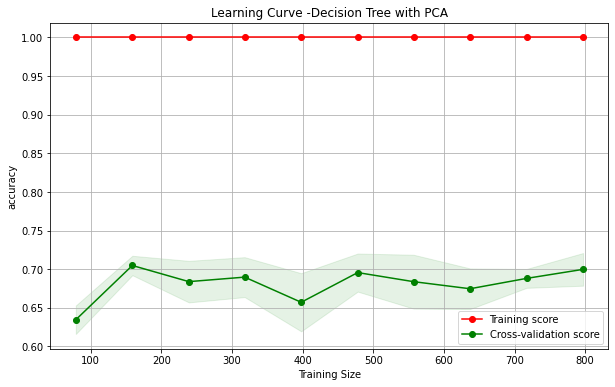

In [49]:
plot_learning_curves(Decision_tree_model, X_train, y_train, "Learning Curve -Decision Tree with PCA")

In [50]:
param_grid = {
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

# Setup the grid search
grid_search = GridSearchCV(estimator=Decision_tree_model, param_grid=param_grid, cv=5, scoring='f1_weighted', verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_dtree = grid_search.best_estimator_
print("Best parameters found:", grid_search.best_params_)

# Predictions using the best model
y_pred = best_dtree.predict(X_val)

# Evaluate the best model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')

print("Accuracy:", accuracy)
print("f1_score: ", f1)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.7466666666666667
f1_score:  0.7115605183347118


SVM with PCA

In [51]:
#define and train model 
svm_model = SVC(kernel='linear')  # You can change the kernel as needed: 'linear', 'poly', 'rbf', 'sigmoid'
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score_weighted: ", f1)
print("Classification Report:\n", report)

Accuracy: 0.6866666666666666
f1_score_weighted:  0.6907597319478955
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81       117
           1       0.60      0.43      0.50        14
           2       0.00      0.00      0.00         5
           3       0.12      0.21      0.16        14

    accuracy                           0.69       150
   macro avg       0.38      0.36      0.37       150
weighted avg       0.70      0.69      0.69       150



c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

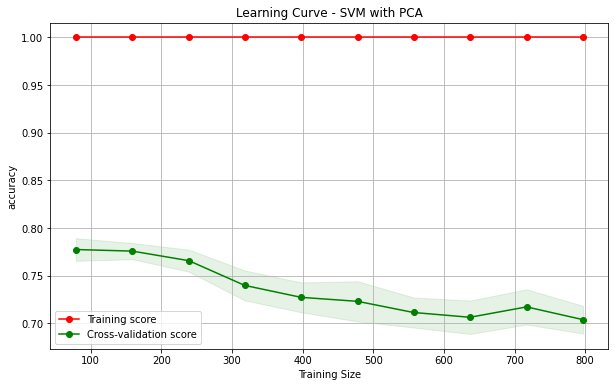

In [52]:
plot_learning_curves(svm_model, X_train, y_train, "Learning Curve - SVM with PCA")

In [53]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1,0.01],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale',  1,2],
    'degree': [2, 3,5]  # Only really applies if kernel is 'poly'
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='f1_weighted', verbose=1, n_jobs=-1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters found:", grid_search.best_params_)

# Best model obtained from grid search
best_svm = grid_search.best_estimator_

# Predict using the best model
y_pred = best_svm.predict(X_val)

# Evaluate the best model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score: ", f1)
print("Classification Report:\n", report)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


Best parameters found: {'C': 0.1, 'degree': 2, 'gamma': 'scale'}
Accuracy: 0.6866666666666666
f1_score:  0.6907597319478955
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81       117
           1       0.60      0.43      0.50        14
           2       0.00      0.00      0.00         5
           3       0.12      0.21      0.16        14

    accuracy                           0.69       150
   macro avg       0.38      0.36      0.37       150
weighted avg       0.70      0.69      0.69       150



c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

Gradient Boosting with PCA

In [54]:
#define Gradiient Boost model
gb_clf = GradientBoostingClassifier(random_state=42)

# Fit the model on the training data
gb_clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = gb_clf.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score: ", f1)
print("Classification Report:\n", report)

Accuracy: 0.7933333333333333
f1_score:  0.739502840909091
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.97      0.88       117
           1       0.75      0.43      0.55        14
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        14

    accuracy                           0.79       150
   macro avg       0.39      0.35      0.36       150
weighted avg       0.70      0.79      0.74       150



In [ ]:
plot_learning_curves(gb_clf, X_train, y_train, "Learning Curve - Gridient Boost with PCA")

In [56]:
param_grid = {
    'n_estimators': [ 50,100,150, 200],
    'learning_rate': [0.01, 0.1, 1 ],
    'max_depth': [3, 6,9],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', None]
}

# Use GridSearch
cv_gb = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=3, scoring='f1_weighted', verbose=1, n_jobs=-1)

# Fit the grid search model
cv_gb.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", cv_gb.best_params_)
print("Best accuracy found: ", cv_gb.best_score_)

# Evaluate the best model
best_gb = cv_gb.best_estimator_
y_pred = best_gb.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score: ", f1)
print("Classification Report:\n", report)


Fitting 3 folds for each of 2 candidates, totalling 6 fits


Best parameters found:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Best accuracy found:  0.7333139261665088
Accuracy: 0.8
f1_score:  0.7344444444444443
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.98      0.88       117
           1       0.71      0.36      0.48        14
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        14

    accuracy                           0.80       150
   macro avg       0.38      0.34      0.34       150
weighted avg       0.69      0.80      0.73       150



c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

XGBoost with pca

In [57]:
#FIT AND DEFINE MODEL
xgBoost_model = xgb.XGBClassifier()
xgBoost_model.fit(X_train, y_train)

# Make predictions
y_pred = xgBoost_model.predict(X_val)

# Evaluate the model with validation
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score: ", f1)
print("Classification Report:\n", report)

Accuracy: 0.82
f1_score:  0.7553103448275863
Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.90       117
           1       1.00      0.43      0.60        14
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        14

    accuracy                           0.82       150
   macro avg       0.45      0.36      0.37       150
weighted avg       0.73      0.82      0.76       150



c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

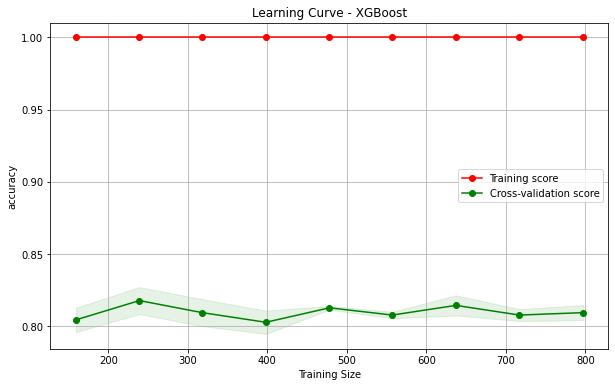

In [58]:
plot_learning_curves(xgBoost_model, X_train, y_train, "Learning Curve - XGBoost")

In [59]:
#define parameter to fine tune
param_grid = {
    'learning_rate': [0.001,0.01,0.1,1,2 ],
    'max_depth': [3,6,9 ],
    'n_estimators': [ 50,100,200],
     'gamma': [ 0.1, 1],

}

#define Grid search
grid_search = GridSearchCV(estimator=xgBoost_model, param_grid=param_grid, cv=3, scoring='f1_weighted', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
#determine the best model
best_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

y_pred = best_model.predict(X_val)  # Make predictions on the validaation set
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score: ", f1)
print("Classification Report:\n", report)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


Best parameters: {'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 200}
Accuracy: 0.8133333333333334
f1_score:  0.7547427766032416
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.98      0.89       117
           1       0.88      0.50      0.64        14
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        14

    accuracy                           0.81       150
   macro avg       0.42      0.37      0.38       150
weighted avg       0.72      0.81      0.75       150



c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

KNN with PCA

In [60]:
k = 5  # Number of neighbors
KNN_model = KNeighborsClassifier(n_neighbors=k)
KNN_model.fit(X_train, y_train)

# Make predictions
y_pred = KNN_model.predict(X_val)

# Evaluate the model with validation
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score: ", f1)
print("Classification Report:\n", report)

Accuracy: 0.7666666666666667
f1_score:  0.6795454545454547
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.98      0.87       117
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        14

    accuracy                           0.77       150
   macro avg       0.20      0.25      0.22       150
weighted avg       0.61      0.77      0.68       150



c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

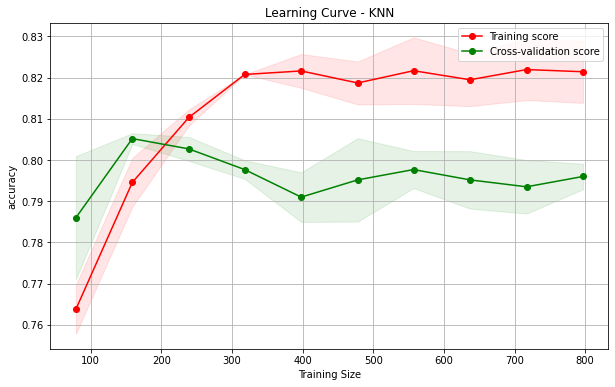

In [61]:
plot_learning_curves(KNN_model, X_train, y_train, "Learning Curve - KNN")

In [62]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],  # Distance metric
}

# Initialize the K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()

# Setup the grid search with cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters found:", grid_search.best_params_)

# Best model obtained from grid search
best_knn = grid_search.best_estimator_

# Predict using the best model
y_pred = best_knn.predict(X_val)

# Evaluate the best model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score: ", f1)
print("Classification Report:\n", report)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


Best parameters found: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
Accuracy: 0.78
f1_score:  0.6835955056179776
Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88       117
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        14

    accuracy                           0.78       150
   macro avg       0.20      0.25      0.22       150
weighted avg       0.61      0.78      0.68       150



c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

LightGBM with pca

In [63]:
params = {
    'objective': 'binary',  # For binary classification
    'metric': 'binary_error'  # Metric to optimize
}

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_val, label=y_val)

num_round = 100  # Number of boosting rounds
lgb_model = lgb.train(params, train_data, num_round, valid_sets=[test_data])

# Make predictions
y_pred = lgb_model.predict(X_val)
y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]  # Convert probabilities to binary predictions

# Evaluate the model with validation
accuracy = accuracy_score(y_val, y_pred_binary)
f1 = f1_score(y_val, y_pred_binary,average='weighted')

report = classification_report(y_val, y_pred_binary)

print("Accuracy:", accuracy)
print("f1_score: ", f1)
print("Classification Report:\n", report)

[LightGBM] [Info] Number of positive: 230, number of negative: 966
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024597 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 127549
[LightGBM] [Info] Number of data points in the train set: 1196, number of used features: 601
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.192308 -> initscore=-1.435085
[LightGBM] [Info] Start training from score -1.435085


Accuracy: 0.8
f1_score:  0.7379979777553083
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.97      0.88       117
           1       0.67      0.43      0.52        14
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        14

    accuracy                           0.80       150
   macro avg       0.37      0.35      0.35       150
weighted avg       0.69      0.80      0.74       150



c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [64]:
param_grid_lgb = {
    'learning_rate': [0.01, 0.1,1],
    'n_estimators': [50, 100, 200],
    'max_depth': [5,10,15],
}
#deine light gbm model
lgb_model = lgb.LGBMClassifier()

# Setup the grid search with cross-validation
grid_search_lgb = GridSearchCV(estimator=lgb_model, param_grid=param_grid_lgb, cv=5, scoring='f1_weighted', verbose=1, n_jobs=-1)

# Fit grid search
grid_search_lgb.fit(X_train, y_train)

# Best parameters found
print("Best parameters found for LightGBM:", grid_search_lgb.best_params_)

# Best model obtained from grid search
best_lgb = grid_search_lgb.best_estimator_

# Predict using the best model
y_pred_lgb = best_lgb.predict(X_val)

# Evaluate the best model

accuracy = accuracy_score(y_val, y_pred_lgb)
f1 = f1_score(y_val, y_pred_lgb,average='weighted')

report = classification_report(y_val, y_pred_lgb)

print("Accuracy:", accuracy)
print("f1_score: ", f1)
print("Classification Report:\n", report)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027363 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 127549
[LightGBM] [Info] Number of data points in the train set: 1196, number of used features: 601
[LightGBM] [Info] Start training from score -0.213574
[LightGBM] [Info] Start training from score -2.609401
[LightGBM] [Info] Start training from score -4.688843
[LightGBM] [Info] Start training from score -2.211541
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

# Approach 3: Over sampling 

In this approach we will increase the number of training set to avoid oversitting thfough generating a new sample data that are generate using SMOTE algorthim

In [65]:
file_path = 'data.csv'
data = pd.read_csv(file_path)

# Assume 'target_column_name' is your categorical target; replace it with your actual column name
target_column_name = 'cancer_type'  # Replace 'cancer_type' with your actual target column

# Encode categorical variables, including the target if it's not numerically categorical
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

# Impute missing values for all columns
imputer = SimpleImputer(strategy='most_frequent')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Normalize only the feature data, exclude target
feature_columns = [col for col in data.columns if col != target_column_name]
scaler = StandardScaler()
data[feature_columns] = scaler.fit_transform(data[feature_columns])

# Split the data
X = data[feature_columns]
y = data[target_column_name].astype(int)  # Ensure the target is treated as an integer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test,X_val,y_test,y_val= train_test_split(X_test, y_test, test_size=0.5, random_state=42)
#over sample the number of samples
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

C:\Users\student\AppData\Local\Temp/ipykernel_5712/4283700151.py:2: DtypeWarning: Columns (662,664,676,677,683,685,686,687) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [66]:
print("Resampled dataset shape:", X_train.shape)

Resampled dataset shape: (3864, 687)


Logistic regression with over sampling

In [71]:
#define logistic model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred = logistic_model.predict(X_val)

# Evaluate the model with validation
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score: ", f1)
print("Classification Report:\n", report)

Accuracy: 0.6866666666666666
f1_score:  0.691157433103779
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.82       117
           1       0.67      0.43      0.52        14
           2       0.00      0.00      0.00         5
           3       0.05      0.07      0.06        14

    accuracy                           0.69       150
   macro avg       0.38      0.33      0.35       150
weighted avg       0.70      0.69      0.69       150



c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

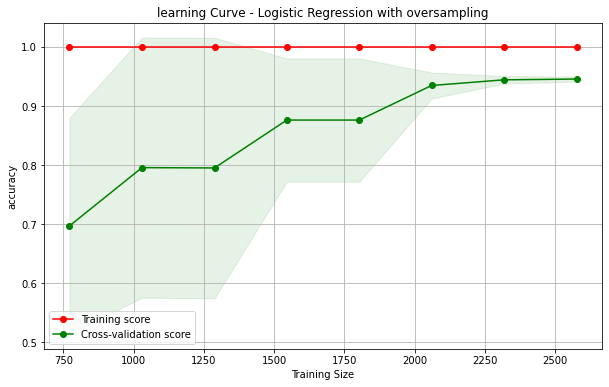

In [72]:
plot_learning_curves(logistic_model, X_train, y_train, "learning Curve - Logistic Regression with oversampling")

In [73]:
#define parameter that we will fine tune the data
param_grid_logistic = {
    'C': [0.01, 0.1,1 ],
    'penalty': ['l1','l2'],
    'solver': ['liblinear', 'saga']  # 'liblinear' and 'saga' support 'l1' and 'l2' penalties
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid_logistic, cv=5, scoring='f1_weighted', verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters found:", grid_search.best_params_)

# Best model obtained from GridSearch
best_model = grid_search.best_estimator_

# Predict using the best model
y_pred = best_model.predict(X_val)

# Evaluate the best model with validation
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')
f1_macro = f1_score(y_val, y_pred,average='macro')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score_weighted: ", f1)
print("f1_score_macro: ", f1_macro)

print("Classification Report:\n", report)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means

Best parameters found: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Accuracy: 0.66
f1_score_weighted:  0.6826748922797492
f1_score_macro:  0.4095940032732583
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80       117
           1       0.50      0.36      0.42        14
           2       0.50      0.20      0.29         5
           3       0.10      0.21      0.14        14

    accuracy                           0.66       150
   macro avg       0.48      0.39      0.41       150
weighted avg       0.72      0.66      0.68       150



c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Random Forest with over sampling approach

In [74]:

# Initialize and train the Random Forest Classifier
Random_forest_model = RandomForestClassifier()
Random_forest_model.fit(X_train, y_train)

# Make predictions
y_pred = Random_forest_model.predict(X_val)

# Evaluate the model with validation
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')
f1_macro = f1_score(y_val, y_pred,average='macro')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score_weighted: ", f1)
print("f1_score_macro: ", f1_macro)

print("Classification Report:\n", report)

Accuracy: 0.8066666666666666
f1_score_weighted:  0.7586912259853437
f1_score_macro:  0.38767082590612
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89       117
           1       0.75      0.43      0.55        14
           2       0.00      0.00      0.00         5
           3       0.25      0.07      0.11        14

    accuracy                           0.81       150
   macro avg       0.46      0.37      0.39       150
weighted avg       0.74      0.81      0.76       150



c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

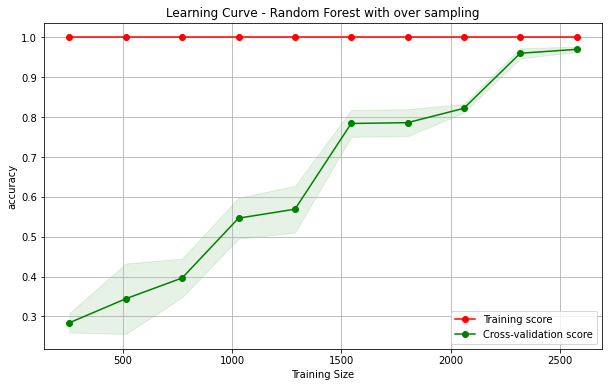

In [75]:
plot_learning_curves(Random_forest_model, X_train, y_train, "Learning Curve - Random Forest with over sampling")

Decsion Tree with oversampling

In [76]:
# Initialize and train the Decision Tree Classifier
Decision_tree_model = DecisionTreeClassifier(random_state=42)
Decision_tree_model.fit(X_train, y_train)

# Make predictions with validation
y_pred = Decision_tree_model.predict(X_val)

# Evaluate the model with validation
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')
f1_macro = f1_score(y_val, y_pred,average='macro')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score_weighted: ", f1)
print("f1_score_macro: ", f1_macro)

print("Classification Report:\n", report)

Accuracy: 0.6266666666666667
f1_score_weighted:  0.6478492285388837
f1_score_macro:  0.3102782585541206
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.74      0.77       117
           1       0.27      0.29      0.28        14
           2       0.00      0.00      0.00         5
           3       0.14      0.29      0.19        14

    accuracy                           0.63       150
   macro avg       0.31      0.33      0.31       150
weighted avg       0.68      0.63      0.65       150



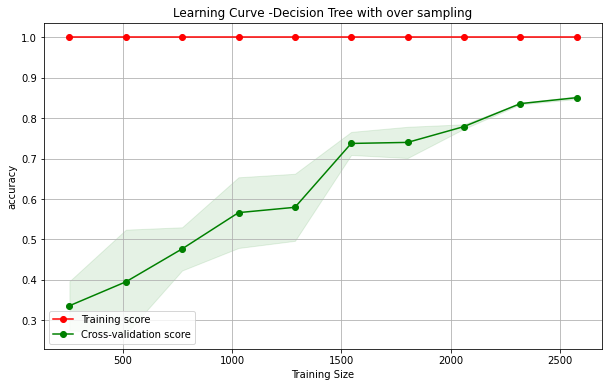

In [77]:
plot_learning_curves(Decision_tree_model, X_train, y_train, "Learning Curve -Decision Tree with over sampling")

Gridient boost with oversampling

In [78]:
#define gradient boost model
gb_clf = GradientBoostingClassifier(random_state=42)

# Fit the model on the training data
gb_clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = gb_clf.predict(X_val)

# Evaluate the model with validation
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score: ", f1)
print("Classification Report:\n", report)
print(gb_clf.get_params())


Accuracy: 0.8
f1_score:  0.7632323232323233
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89       117
           1       0.71      0.36      0.48        14
           2       0.00      0.00      0.00         5
           3       0.38      0.21      0.27        14

    accuracy                           0.80       150
   macro avg       0.48      0.38      0.41       150
weighted avg       0.75      0.80      0.76       150

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [ ]:
plot_learning_curves(gb_clf, X_train, y_train, "Learning Curve - GradientBoosting with over sampling")

In [ ]:
#Define paramter value to fine tune
param_grid = {
    'n_estimators': [ 20, 50,100,200],
    'learning_rate': [0.01,0.1,1],
    'max_depth': [3, 6,9],
    'min_samples_split': [2,4,6],
   
}
# Use GridSearch
cv_gb = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=3, scoring='f1_weighted', verbose=1, n_jobs=-1)

# Fit the grid search model
cv_gb.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", cv_gb.best_params_)
print("Best accuracy found: ", cv_gb.best_score_)

# Evaluate the best model with validation set
best_gb = cv_gb.best_estimator_
y_pred = best_gb.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')
f1_macro = f1_score(y_val, y_pred,average='macro')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score_weighted: ", f1)
print("f1_score_macro: ", f1_macro)

print("Classification Report:\n", report)

SVM with over sampling

In [80]:
#define SVM model
svm_model = SVC()  # You can change the kernel as needed: 'linear', 'poly', 'rbf', 'sigmoid'
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score: ", f1)
print("Classification Report:\n", report)

Accuracy: 0.7933333333333333
f1_score:  0.7210020129724893
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.99      0.88       117
           1       1.00      0.21      0.35        14
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        14

    accuracy                           0.79       150
   macro avg       0.45      0.30      0.31       150
weighted avg       0.71      0.79      0.72       150



c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

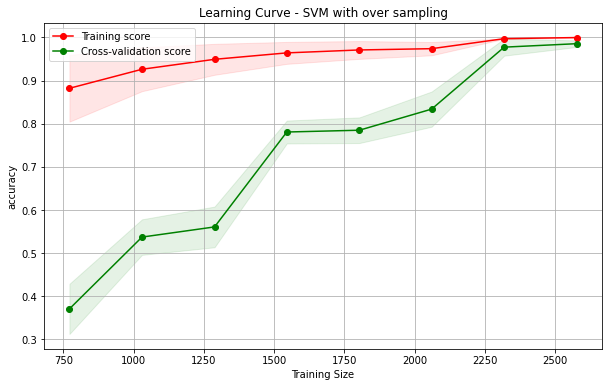

In [81]:
plot_learning_curves(svm_model, X_train, y_train, "Learning Curve - SVM with over sampling")

In [82]:
param_grid = {
    'C': [ 1, 5,10,15],
    'kernel': ['linear', 'rbf', ],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'degree': [2,4,6]  # Only really applies if kernel is 'poly'
}
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='f1_weighted', verbose=1, n_jobs=-1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters found:", grid_search.best_params_)

# Best model obtained from grid search
best_svm = grid_search.best_estimator_

# Predict using the best model
y_pred = best_svm.predict(X_val)

# Evaluate the best model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')
f1_macro = f1_score(y_val, y_pred,average='macro')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score_weighted: ", f1)
print("f1_score_macro: ", f1_macro)

print("Classification Report:\n", report)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


Best parameters found: {'C': 10, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
Accuracy: 0.7866666666666666
f1_score_weighted:  0.7202974983096686
f1_score_macro:  0.30854180752760874
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.98      0.88       117
           1       1.00      0.21      0.35        14
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        14

    accuracy                           0.79       150
   macro avg       0.45      0.30      0.31       150
weighted avg       0.72      0.79      0.72       150



c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

XG Boost with over ssampling

In [83]:
import xgboost as xgb
# define model and train it
xgBoost_model = xgb.XGBClassifier()
xgBoost_model.fit(X_train, y_train)

# Make predictions
y_pred = xgBoost_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score: ", f1)
print("Classification Report:\n", report)

Accuracy: 0.7933333333333333
f1_score:  0.729298245614035
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.98      0.88       117
           1       0.80      0.29      0.42        14
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        14

    accuracy                           0.79       150
   macro avg       0.40      0.32      0.33       150
weighted avg       0.70      0.79      0.73       150



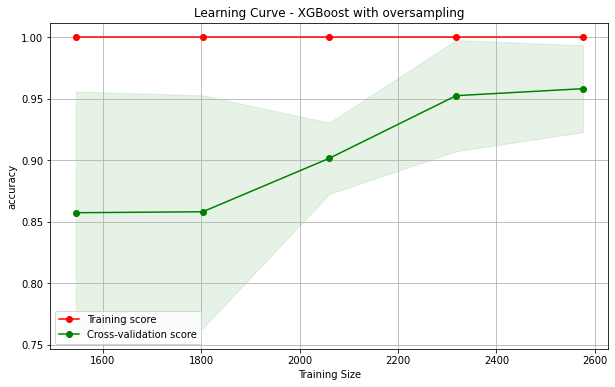

In [84]:
plot_learning_curves(xgBoost_model, X_train, y_train, "Learning Curve - XGBoost with oversampling")

In [85]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = {
    'learning_rate': [0.01,0.1,1 ],
    'max_depth': [9,6,3 ],
    'n_estimators': [ 50, 100,150,200],
}

#train to find best param for the xgboost
grid_search = GridSearchCV(estimator=xgBoost_model, param_grid=param_grid, cv=3, scoring='f1_weighted', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

y_pred = best_model.predict(X_val)  # Make predictions on the val set
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')
f1_macro = f1_score(y_val, y_pred,average='macro')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score_weighted: ", f1)
print("f1_score_macro: ", f1_macro)

print("Classification Report:\n", report)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


Best parameters: {'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 200}
Accuracy: 0.7866666666666666
f1_score_weighted:  0.7480999397853719
f1_score_macro:  0.4229788918858727
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.95      0.88       117
           1       0.67      0.43      0.52        14
           2       0.50      0.20      0.29         5
           3       0.00      0.00      0.00        14

    accuracy                           0.79       150
   macro avg       0.50      0.39      0.42       150
weighted avg       0.73      0.79      0.75       150



KNN Neighbor with oversampling

In [87]:

k = 5  # Number of neighbors
KNN_model = KNeighborsClassifier(n_neighbors=k)
KNN_model.fit(X_train, y_train)

# Make predictions
y_pred = KNN_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score: ", f1)
print("Classification Report:\n", report)

Accuracy: 0.14666666666666667
f1_score:  0.10082034895961756
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.04      0.08       117
           1       0.13      0.64      0.22        14
           2       0.00      0.00      0.00         5
           3       0.11      0.57      0.18        14

    accuracy                           0.15       150
   macro avg       0.27      0.31      0.12       150
weighted avg       0.67      0.15      0.10       150



LGB with oversampling

In [88]:
import lightgbm as lgb
# Initialize and train the LightGBM model
params = {
    'objective': 'binary',  # For binary classification
    'metric': 'binary_error'  # Metric to optimize
}

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_val, label=y_val)

num_round = 100  # Number of boosting rounds
lgb_model = lgb.train(params, train_data, num_round, valid_sets=[test_data])

# Make predictions
y_pred = lgb_model.predict(X_val)
y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]  # Convert probabilities to binary predictions

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred_binary)
f1 = f1_score(y_val, y_pred_binary,average='weighted')

report = classification_report(y_val, y_pred_binary)

print("Accuracy:", accuracy)
print("f1_score: ", f1)
print("Classification Report:\n", report)

[LightGBM] [Info] Number of positive: 2898, number of negative: 966
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.042350 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 138449
[LightGBM] [Info] Number of data points in the train set: 3864, number of used features: 652
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.750000 -> initscore=1.098612
[LightGBM] [Info] Start training from score 1.098612


Accuracy: 0.78
f1_score:  0.7272279769809651
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.93      0.87       117
           1       0.50      0.57      0.53        14
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        14

    accuracy                           0.78       150
   macro avg       0.33      0.38      0.35       150
weighted avg       0.68      0.78      0.73       150



c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

# Approach 4: Under Sampling data

we try to handle the imbalance data by under sampling the high percent of cancer type

In [89]:
file_path = 'data.csv'
data = pd.read_csv(file_path)

# Assume 'target_column_name' is your categorical target; replace it with your actual column name
target_column_name = 'cancer_type'  # Replace 'cancer_type' with your actual target column

# Encode categorical variables, including the target if it's not numerically categorical
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

# Impute missing values for all columns
imputer = SimpleImputer(strategy='most_frequent')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Normalize only the feature data, exclude target
feature_columns = [col for col in data.columns if col != target_column_name]
scaler = StandardScaler()
data[feature_columns] = scaler.fit_transform(data[feature_columns])

# Split the data
X = data[feature_columns]
y = data[target_column_name].astype(int)  # Ensure the target is treated as an integer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test,X_val,y_test,y_val= train_test_split(X_test, y_test, test_size=0.5, random_state=42)
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=2)
X_train, y_train = rus.fit_resample(X_train, y_train)

C:\Users\student\AppData\Local\Temp/ipykernel_5712/298142634.py:2: DtypeWarning: Columns (662,664,676,677,683,685,686,687) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [90]:
print("Resampled dataset shape:", X_train.shape)

Resampled dataset shape: (44, 687)


Logistic regression with under sampling

In [91]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred = logistic_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score: ", f1)
print("Classification Report:\n", report)

Accuracy: 0.38666666666666666
f1_score:  0.4519636387324486
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.38      0.52       117
           1       0.17      0.36      0.23        14
           2       0.19      0.60      0.29         5
           3       0.12      0.43      0.18        14

    accuracy                           0.39       150
   macro avg       0.33      0.44      0.30       150
weighted avg       0.68      0.39      0.45       150



SVM with under sampling

In [92]:
from sklearn.svm import SVC

svm_model = SVC()  # You can change the kernel as needed: 'linear', 'poly', 'rbf', 'sigmoid'
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score: ", f1)
print("Classification Report:\n", report)

Accuracy: 0.35333333333333333
f1_score:  0.4095792955061695
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.31      0.45       117
           1       0.21      0.36      0.26        14
           2       0.27      0.60      0.37         5
           3       0.12      0.64      0.21        14

    accuracy                           0.35       150
   macro avg       0.37      0.48      0.32       150
weighted avg       0.71      0.35      0.41       150



Gradient Boost with under sampling

In [93]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(random_state=42)

# Fit the model on the training data
gb_clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = gb_clf.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score: ", f1)
print("Classification Report:\n", report)

Accuracy: 0.31333333333333335
f1_score:  0.38711991499696413
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.32      0.46       117
           1       0.06      0.14      0.09        14
           2       0.07      0.40      0.12         5
           3       0.13      0.43      0.20        14

    accuracy                           0.31       150
   macro avg       0.27      0.32      0.22       150
weighted avg       0.66      0.31      0.39       150



Xgb with under sampling

In [94]:
import xgboost as xgb


# Initialize and train the XGBoost classifier
xgBoost_model = xgb.XGBClassifier()
xgBoost_model.fit(X_train, y_train)

# Make predictions
y_pred = xgBoost_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score: ", f1)
print("Classification Report:\n", report)

Accuracy: 0.32
f1_score:  0.36864243943191316
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.26      0.41       117
           1       0.12      0.36      0.18        14
           2       0.13      0.80      0.23         5
           3       0.19      0.57      0.28        14

    accuracy                           0.32       150
   macro avg       0.33      0.50      0.27       150
weighted avg       0.72      0.32      0.37       150



the under sampling data has a very bad performance with the models, so these values is not included in the report

# Approach 6: balanced sample data

Read the data

In [6]:
file_path = 'data.csv'
data = pd.read_csv(file_path)

# Assume 'target_column_name' is your categorical target; replace it with your actual column name
target_column_name = 'cancer_type'  # Replace 'cancer_type' with your actual target column

# Encode categorical variables, including the target if it's not numerically categorical
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

# Impute missing values for all columns
imputer = SimpleImputer(strategy='most_frequent')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Normalize only the feature data, exclude target
feature_columns = [col for col in data.columns if col != target_column_name]
scaler = StandardScaler()
data[feature_columns] = scaler.fit_transform(data[feature_columns])

# Split the data
X = data[feature_columns]
y = data[target_column_name].astype(int)  # Ensure the target is treated as an integer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test,X_val,y_test,y_val= train_test_split(X_test, y_test, test_size=0.5, random_state=42)
from sklearn.utils.class_weight import compute_sample_weight

# Compute class weights
sample_weight = compute_sample_weight(class_weight='balanced', y=y_train)


C:\Users\student\AppData\Local\Temp/ipykernel_16956/1136797882.py:2: DtypeWarning: Columns (662,664,676,677,683,685,686,687) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Logistic regression with sample balanced weight

In [99]:
#define variable for logistic regression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train, sample_weight=sample_weight)

# Make predictions
y_pred = logistic_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score: ", f1)
print("Classification Report:\n", report)

Accuracy: 0.68
f1_score:  0.6851851851851851
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       117
           1       0.60      0.43      0.50        14
           2       0.00      0.00      0.00         5
           3       0.05      0.07      0.06        14

    accuracy                           0.68       150
   macro avg       0.36      0.33      0.34       150
weighted avg       0.69      0.68      0.69       150



Random Foest Model with balanced sample

In [100]:

# Initialize and train the Random Forest Classifier
Random_forest_model = RandomForestClassifier()
Random_forest_model.fit(X_train, y_train, sample_weight=sample_weight)

# Make predictions
y_pred = Random_forest_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score: ", f1)
print("Classification Report:\n", report)

Accuracy: 0.78
f1_score:  0.6835955056179776
Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88       117
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        14

    accuracy                           0.78       150
   macro avg       0.20      0.25      0.22       150
weighted avg       0.61      0.78      0.68       150



c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

Gradient Boost with balanced weight

In [101]:
from sklearn.ensemble import GradientBoostingClassifier
#define the model and train it
gb_clf = GradientBoostingClassifier(random_state=42)

# Fit the model on the training data
gb_clf.fit(X_train, y_train, sample_weight=sample_weight)

# Make predictions on the testing set
y_pred = gb_clf.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score: ", f1)
print("Classification Report:\n", report)

Accuracy: 0.8066666666666666
f1_score:  0.7747289629361341
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.95      0.88       117
           1       0.88      0.50      0.64        14
           2       0.00      0.00      0.00         5
           3       0.38      0.21      0.27        14

    accuracy                           0.81       150
   macro avg       0.52      0.42      0.45       150
weighted avg       0.76      0.81      0.77       150



c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

SVM with balanced Weight

In [102]:
#define model and train data
svm_model = SVC()  # You can change the kernel as needed: 'linear', 'poly', 'rbf', 'sigmoid'
svm_model.fit(X_train, y_train, sample_weight=sample_weight)

# Make predictions
y_pred = svm_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score: ", f1)
print("Classification Report:\n", report)

Accuracy: 0.6933333333333334
f1_score:  0.7058910112424766
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.79      0.82       117
           1       0.62      0.36      0.45        14
           2       0.00      0.00      0.00         5
           3       0.19      0.43      0.26        14

    accuracy                           0.69       150
   macro avg       0.41      0.40      0.38       150
weighted avg       0.74      0.69      0.71       150



c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

XGBoost with balanced sample

In [103]:
#define the model and train it with train data
xgBoost_model = xgb.XGBClassifier()
xgBoost_model.fit(X_train, y_train, sample_weight=sample_weight)

# Make predictions
y_pred = xgBoost_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score: ", f1)
print("Classification Report:\n", report)

Accuracy: 0.8066666666666666
f1_score:  0.7453539253539254
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.99      0.90       117
           1       0.83      0.36      0.50        14
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        14

    accuracy                           0.81       150
   macro avg       0.41      0.34      0.35       150
weighted avg       0.71      0.81      0.75       150



# Approach 7: Manual Feature Selection

Preprocess the data

In [3]:
# Load the data
file_path = 'data.csv'
data = pd.read_csv(file_path)

# Assume 'target_column_name' is your categorical target; replace it with your actual column name
target_column_name = 'cancer_type'  # Replace 'cancer_type' with your actual target column

# Encode categorical variables, including the target if it's not numerically categorical
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

# Impute missing values for all columns
imputer = SimpleImputer(strategy='most_frequent')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Normalize only the feature data, exclude target
feature_columns = [col for col in data.columns if col != target_column_name]
scaler = StandardScaler()
data[feature_columns] = scaler.fit_transform(data[feature_columns])

# Split the data
#specify the feature that you want
X = data[[
  "brca1_mut",
  "brca2_mut",
  "er_status",
  "her2_status",
  "er_status_measured_by_ihc",
  "her2_status_measured_by_snp6",
  "tumor_size",
  "tumor_stage",
  "lymph_nodes_examined_positive",
  "age_at_diagnosis"]
]
y = data[target_column_name].astype(int)  # Ensure the target is treated as an integer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test,X_val,y_test,y_val= train_test_split(X_test, y_test, test_size=0.5, random_state=42)

C:\Users\student\AppData\Local\Temp/ipykernel_16956/4267824458.py:3: DtypeWarning: Columns (662,664,676,677,683,685,686,687) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Logistic Regression with manual feature selection

In [105]:
#define logist regressiuon model and train the model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred = logistic_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score: ", f1)
print("Classification Report:\n", report)

Accuracy: 0.78
f1_score:  0.6835955056179776
Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88       117
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        14

    accuracy                           0.78       150
   macro avg       0.20      0.25      0.22       150
weighted avg       0.61      0.78      0.68       150



c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

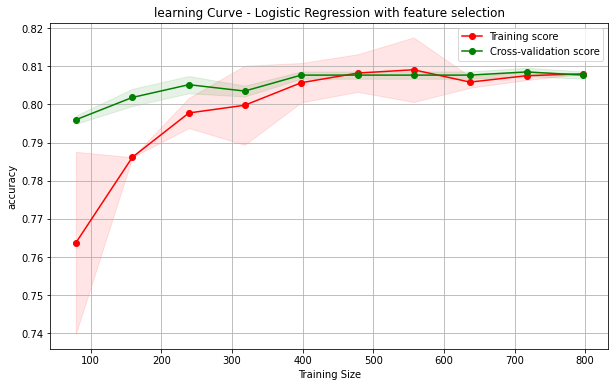

In [106]:
plot_learning_curves(logistic_model, X_train, y_train, "learning Curve - Logistic Regression with feature selection")

In [107]:
param_grid_logistic = {
    'C': [0.01, 0.1,1 ],
    'penalty': ['l1'],
    'solver': ['liblinear', 'saga']  # 'liblinear' and 'saga' support 'l1' and 'l2' penalties
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid_logistic, cv=5, scoring='f1_weighted', verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters found:", grid_search.best_params_)

# Best model obtained from GridSearch
best_model = grid_search.best_estimator_

# Predict using the best model
y_pred = best_model.predict(X_val)

# Evaluate the best model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score: ", f1)
print("Classification Report:\n", report)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters found: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.78
f1_score:  0.6835955056179776
Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88       117
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        14

    accuracy                           0.78       150
   macro avg       0.20      0.25      0.22       150
weighted avg       0.61      0.78      0.68       150



c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

Random forest model for manual feature selection

In [4]:

# Initialize and train the Random Forest Classifier
Random_forest_model = RandomForestClassifier()
Random_forest_model.fit(X_train, y_train)

# Make predictions
y_pred = Random_forest_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')
f1_macro = f1_score(y_val, y_pred,average='macro')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score_weighted: ", f1)
print("f1_score_macro: ", f1_macro)

print("Classification Report:\n", report)

Accuracy: 0.74
f1_score_weighted:  0.680450634057971
f1_score_macro:  0.2563688858695652
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.93      0.85       117
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00         5
           3       0.22      0.14      0.17        14

    accuracy                           0.74       150
   macro avg       0.25      0.27      0.26       150
weighted avg       0.63      0.74      0.68       150



c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

decision tree model with manual feature selection

In [5]:

# Initialize and train the Decision Tree Classifier
Decision_tree_model = DecisionTreeClassifier(random_state=42)
Decision_tree_model.fit(X_train, y_train)

# Make predictions
y_pred = Decision_tree_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')
f1_macro = f1_score(y_val, y_pred,average='macro')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score_weighted: ", f1)
print("f1_score_macro: ", f1_macro)

print("Classification Report:\n", report)

Accuracy: 0.64
f1_score_weighted:  0.6448538011695906
f1_score_macro:  0.2590852130325814
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80       117
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00         5
           3       0.18      0.36      0.24        14

    accuracy                           0.64       150
   macro avg       0.25      0.28      0.26       150
weighted avg       0.66      0.64      0.64       150



SVM with feature selection

In [108]:
from sklearn.svm import SVC

svm_model = SVC()  # You can change the kernel as needed: 'linear', 'poly', 'rbf', 'sigmoid'
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score: ", f1)
print("Classification Report:\n", report)

Accuracy: 0.78
f1_score:  0.6835955056179776
Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88       117
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        14

    accuracy                           0.78       150
   macro avg       0.20      0.25      0.22       150
weighted avg       0.61      0.78      0.68       150



c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

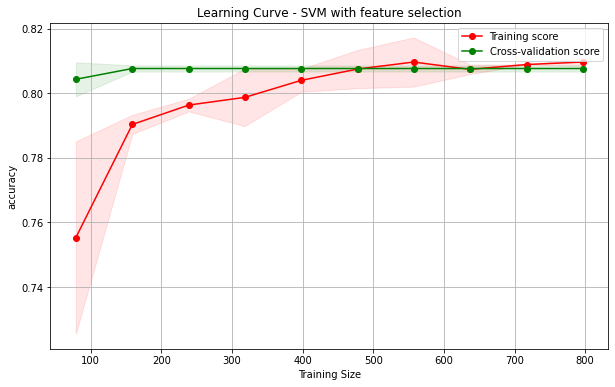

In [109]:
plot_learning_curves(svm_model, X_train, y_train, "Learning Curve - SVM with feature selection")

In [110]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'degree': [2, 3, 4]  # Only really applies if kernel is 'poly'
}
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='f1_weighted', verbose=1, n_jobs=-1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters found:", grid_search.best_params_)

# Best model obtained from grid search
best_svm = grid_search.best_estimator_

# Predict using the best model
y_pred = best_svm.predict(X_val)

# Evaluate the best model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')

print("Accuracy:", accuracy)
print("f1_score: ", f1)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


Gradient Boost with feature selection

In [5]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(random_state=42)

# Fit the model on the training data
gb_clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = gb_clf.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score: ", f1)
print("Classification Report:\n", report)

Accuracy: 0.7666666666666667
f1_score:  0.6871781107880414
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.97      0.87       117
           1       0.33      0.07      0.12        14
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        14

    accuracy                           0.77       150
   macro avg       0.28      0.26      0.25       150
weighted avg       0.64      0.77      0.69       150



c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

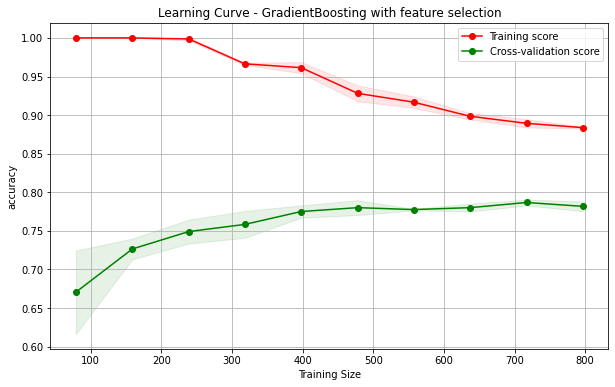

In [6]:
plot_learning_curves(gb_clf, X_train, y_train, "Learning Curve - GradientBoosting with feature selection")

In [7]:
param_grid = {
    'n_estimators': [ 20, 50,100,200],
    'learning_rate': [0.01,0.1,1],
    'max_depth': [3, 6,9],
    'min_samples_split': [2,4,6],

}
from sklearn.model_selection import train_test_split, GridSearchCV

# Use GridSearch
cv_gb = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=3, scoring='f1_weighted', verbose=1, n_jobs=-1)

# Fit the grid search model
cv_gb.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", cv_gb.best_params_)
print("Best accuracy found: ", cv_gb.best_score_)

# Evaluate the best model
best_gb = cv_gb.best_estimator_
y_pred = best_gb.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score: ", f1)
print("Classification Report:\n", report)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


Best parameters found:  {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 200}
Best accuracy found:  0.7215481069985602
Accuracy: 0.7733333333333333
f1_score:  0.6803007518796993
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.99      0.87       117
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        14

    accuracy                           0.77       150
   macro avg       0.19      0.25      0.22       150
weighted avg       0.61      0.77      0.68       150



c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

Xg boosting with feature selection

In [8]:
import xgboost as xgb


# Initialize and train the XGBoost classifier
xgBoost_model = xgb.XGBClassifier()
xgBoost_model.fit(X_train, y_train)

# Make predictions
y_pred = xgBoost_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score: ", f1)
print("Classification Report:\n", report)

Accuracy: 0.7533333333333333
f1_score:  0.6754022988505747
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.97      0.87       117
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        14

    accuracy                           0.75       150
   macro avg       0.20      0.24      0.22       150
weighted avg       0.61      0.75      0.68       150



c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

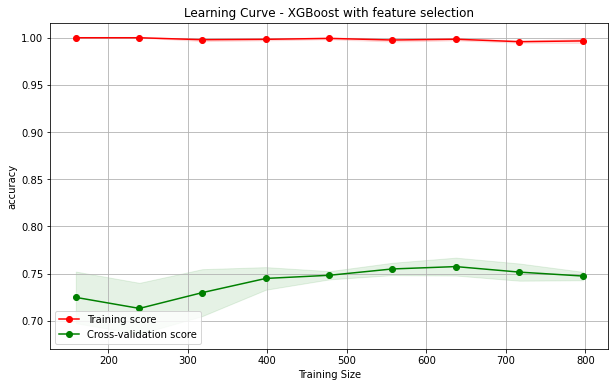

In [9]:
plot_learning_curves(xgBoost_model, X_train, y_train, "Learning Curve - XGBoost with feature selection")

In [10]:
#drfine paramter to fine tune
param_grid = {
    'learning_rate': [0.001, 0.01,0.1,1 ],
    'max_depth': [3, 6,9],
    'n_estimators': [ 50,100,200],
     'gamma': [ 0.1, 1 ],

}

grid_search = GridSearchCV(estimator=xgBoost_model, param_grid=param_grid, cv=3, scoring='f1_weighted', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

y_pred = best_model.predict(X_val)  # Make predictions on the test set
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score: ", f1)
print("Classification Report:\n", report)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


Best parameters: {'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 9, 'n_estimators': 200}
Accuracy: 0.7866666666666666
f1_score:  0.698609857978279
Classification Report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88       117
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00         5
           3       1.00      0.07      0.13        14

    accuracy                           0.79       150
   macro avg       0.45      0.27      0.25       150
weighted avg       0.71      0.79      0.70       150



c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

KNN neighbor with feature selection

In [11]:
from sklearn.neighbors import KNeighborsClassifier

k = 5  # Number of neighbors
KNN_model = KNeighborsClassifier(n_neighbors=k)
KNN_model.fit(X_train, y_train)

# Make predictions
y_pred = KNN_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score: ", f1)
print("Classification Report:\n", report)

Accuracy: 0.78
f1_score:  0.6861654135338345
Classification Report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88       117
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        14

    accuracy                           0.78       150
   macro avg       0.20      0.25      0.22       150
weighted avg       0.61      0.78      0.69       150



c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

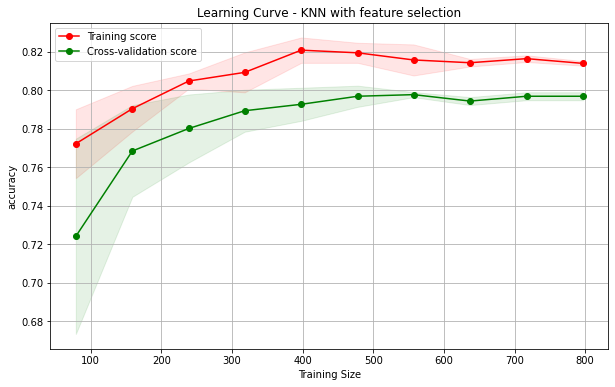

In [12]:
plot_learning_curves(KNN_model, X_train, y_train, "Learning Curve - KNN with feature selection")

In [13]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],  # Distance metric
}

# Initialize the K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()

# Setup the grid search with cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters found:", grid_search.best_params_)

# Best model obtained from grid search
best_knn = grid_search.best_estimator_

# Predict using the best model
y_pred = best_knn.predict(X_val)

# Evaluate the best model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score: ", f1)
print("Classification Report:\n", report)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


Best parameters found: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Accuracy: 0.7733333333333333
f1_score:  0.6803007518796993
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.99      0.87       117
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        14

    accuracy                           0.77       150
   macro avg       0.19      0.25      0.22       150
weighted avg       0.61      0.77      0.68       150



c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

LGB with feature selection

In [14]:
import lightgbm as lgb
# Initialize and train the LightGBM model
params = {
    'objective': 'binary',  # For binary classification
    'metric': 'binary_error'  # Metric to optimize
}

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_val, label=y_val)

num_round = 100  # Number of boosting rounds
lgb_model = lgb.train(params, train_data, num_round, valid_sets=[test_data])

# Make predictions
y_pred = lgb_model.predict(X_val)
y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]  # Convert probabilities to binary predictions

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred_binary)
f1 = f1_score(y_val, y_pred_binary,average='weighted')

report = classification_report(y_val, y_pred_binary)

print("Accuracy:", accuracy)
print("f1_score: ", f1)
print("Classification Report:\n", report)

[LightGBM] [Info] Number of positive: 230, number of negative: 966
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000408 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 372
[LightGBM] [Info] Number of data points in the train set: 1196, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.192308 -> initscore=-1.435085
[LightGBM] [Info] Start training from score -1.435085
Accuracy: 0.74
f1_score:  0.6710331110331108
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.94      0.85       117
           1       0.12      0.07      0.09        14
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        14

    accuracy                           0.74       150
   macro avg       0.22      0.25      0.24       150

c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [15]:
param_grid_lgb = {
    'learning_rate': [0.01, 0.1,1],
    'n_estimators': [50, 100, 200],
    'max_depth': [5,10,20],
}
lgb_model = lgb.LGBMClassifier()

# Setup the grid search with cross-validation
grid_search_lgb = GridSearchCV(estimator=lgb_model, param_grid=param_grid_lgb, cv=5, scoring='f1_weighted', verbose=1, n_jobs=-1)

# Fit grid search
grid_search_lgb.fit(X_train, y_train)

# Best parameters found
print("Best parameters found for LightGBM:", grid_search_lgb.best_params_)

# Best model obtained from grid search
best_lgb = grid_search_lgb.best_estimator_

# Predict using the best model
y_pred_lgb = best_lgb.predict(X_val)

# Evaluate the best model

accuracy = accuracy_score(y_val, y_pred_lgb)
f1 = f1_score(y_val, y_pred_lgb,average='weighted')

report = classification_report(y_val, y_pred_lgb)

print("Accuracy:", accuracy)
print("f1_score: ", f1)
print("Classification Report:\n", report)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000209 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 372
[LightGBM] [Info] Number of data points in the train set: 1196, number of used features: 10
[LightGBM] [Info] Start training from score -0.213574
[LightGBM] [Info] Start training from score -2.609401
[LightGBM] [Info] Start training from score -4.688843
[LightGBM] [Info] Start training from score -2.211541
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

# Approach 8: Over sampling and balanced data

Read the data

In [16]:
file_path = 'data.csv'
data = pd.read_csv(file_path)

# Assume 'target_column_name' is your categorical target; replace it with your actual column name
target_column_name = 'cancer_type'  # Replace 'cancer_type' with your actual target column

# Encode categorical variables, including the target if it's not numerically categorical
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

# Impute missing values for all columns
imputer = SimpleImputer(strategy='most_frequent')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Normalize only the feature data, exclude target
feature_columns = [col for col in data.columns if col != target_column_name]
scaler = StandardScaler()
data[feature_columns] = scaler.fit_transform(data[feature_columns])

# Split the data
X = data[feature_columns]
y = data[target_column_name].astype(int)  # Ensure the target is treated as an integer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test,X_val,y_test,y_val= train_test_split(X_test, y_test, test_size=0.5, random_state=42)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
from sklearn.utils.class_weight import compute_sample_weight

# Compute class weights
sample_weight = compute_sample_weight(class_weight='balanced', y=y_train)


C:\Users\student\AppData\Local\Temp/ipykernel_28020/1393714185.py:2: DtypeWarning: Columns (662,664,676,677,683,685,686,687) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Logistic Regression

In [17]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train, sample_weight=sample_weight)

# Make predictions
y_pred = logistic_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score: ", f1)
print("Classification Report:\n", report)

Accuracy: 0.7066666666666667
f1_score:  0.6998673202228389
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       116
           1       0.56      0.42      0.48        12
           2       0.00      0.00      0.00         2
           3       0.14      0.15      0.15        20

    accuracy                           0.71       150
   macro avg       0.38      0.35      0.36       150
weighted avg       0.70      0.71      0.70       150



c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

Random Forest

In [18]:

# Initialize and train the Random Forest Classifier
Random_forest_model = RandomForestClassifier()
Random_forest_model.fit(X_train, y_train, sample_weight=sample_weight)

# Make predictions
y_pred = Random_forest_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score: ", f1)
print("Classification Report:\n", report)

Accuracy: 0.7733333333333333
f1_score:  0.696888888888889
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.98      0.87       116
           1       0.67      0.17      0.27        12
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00        20

    accuracy                           0.77       150
   macro avg       0.36      0.29      0.29       150
weighted avg       0.66      0.77      0.70       150



c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

Gradient Boost

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(random_state=42)

# Fit the model on the training data
gb_clf.fit(X_train, y_train, sample_weight=sample_weight)

# Make predictions on the testing set
y_pred = gb_clf.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score: ", f1)
print("Classification Report:\n", report)

Accuracy: 0.7733333333333333
f1_score:  0.7230849989905108
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.96      0.87       116
           1       0.50      0.25      0.33        12
           2       0.00      0.00      0.00         2
           3       0.33      0.10      0.15        20

    accuracy                           0.77       150
   macro avg       0.41      0.33      0.34       150
weighted avg       0.71      0.77      0.72       150



c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

Svm

In [20]:
from sklearn.svm import SVC

svm_model = SVC()  # You can change the kernel as needed: 'linear', 'poly', 'rbf', 'sigmoid'
svm_model.fit(X_train, y_train, sample_weight=sample_weight)

# Make predictions
y_pred = svm_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score: ", f1)
print("Classification Report:\n", report)

Accuracy: 0.7866666666666666
f1_score:  0.716011396011396
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.99      0.88       116
           1       1.00      0.08      0.15        12
           2       0.00      0.00      0.00         2
           3       0.50      0.10      0.17        20

    accuracy                           0.79       150
   macro avg       0.57      0.29      0.30       150
weighted avg       0.76      0.79      0.72       150



c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

XGBOOST

In [21]:
import xgboost as xgb

xgBoost_model = xgb.XGBClassifier()
xgBoost_model.fit(X_train, y_train, sample_weight=sample_weight)

# Make predictions
y_pred = xgBoost_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score: ", f1)
print("Classification Report:\n", report)

Accuracy: 0.8066666666666666
f1_score:  0.7447866098449755
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.99      0.89       116
           1       0.62      0.42      0.50        12
           2       0.00      0.00      0.00         2
           3       1.00      0.05      0.10        20

    accuracy                           0.81       150
   macro avg       0.61      0.36      0.37       150
weighted avg       0.81      0.81      0.74       150



c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

# Approach 9: Feature Selection Model

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Load the data from an Excel file
file_path = 'data.csv'
data = pd.read_csv(file_path)

# Assume 'cancer_type' is the target
target_column_name = 'cancer_type'

# Encode categorical variables
categorical_cols = data.select_dtypes(include=['object']).columns  # Adjust if your categorical data isn't only 'object' type
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

# Impute missing values with the most frequent value in each column
imputer = SimpleImputer(strategy='most_frequent')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Normalize the feature data
scaler = StandardScaler()
feature_columns = [col for col in data.columns if col != target_column_name]  # Exclude target column from scaling
data_imputed[feature_columns] = scaler.fit_transform(data_imputed[feature_columns])

# Split the data into training and testing sets
X = data_imputed[feature_columns]
y = data_imputed[target_column_name].astype(int) 
# Create a random forest classifier
forest = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Fit the classifier to get feature importances
forest.fit(X, y)

# Create a selector object that will use the random forest classifier to identify features that have an importance of more than 0.01
selector = SelectFromModel(forest, threshold='mean')
X_important = selector.fit_transform(X, y)

# Fit model on training data using only the important features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test,X_val,y_test,y_val= train_test_split(X_test, y_test, test_size=0.5, random_state=42)

C:\Users\student\AppData\Local\Temp/ipykernel_28020/2534583532.py:10: DtypeWarning: Columns (662,664,676,677,683,685,686,687) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [ ]:
X_train.shape

(1196, 352)

Logistic regression with model feature selection

In [23]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred = logistic_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')
f1_macro = f1_score(y_val, y_pred,average='macro')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score_weighted: ", f1)
print("f1_score_macro: ", f1_macro)

print("Classification Report:\n", report)

Accuracy: 0.7
f1_score_weighted:  0.6987522281639927
f1_score_macro:  0.35695187165775394
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82       117
           1       0.75      0.43      0.55        14
           2       0.00      0.00      0.00         5
           3       0.05      0.07      0.06        14

    accuracy                           0.70       150
   macro avg       0.40      0.33      0.36       150
weighted avg       0.71      0.70      0.70       150



Random Forest with Feature selection Model

In [24]:

# Initialize and train the Random Forest Classifier
Random_forest_model = RandomForestClassifier()
Random_forest_model.fit(X_train, y_train)

# Make predictions
y_pred = Random_forest_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')
f1_macro = f1_score(y_val, y_pred,average='macro')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score_weighted: ", f1)
print("f1_score_macro: ", f1_macro)

print("Classification Report:\n", report)

Accuracy: 0.78
f1_score_weighted:  0.6835955056179776
f1_score_macro:  0.21910112359550563
Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88       117
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        14

    accuracy                           0.78       150
   macro avg       0.20      0.25      0.22       150
weighted avg       0.61      0.78      0.68       150



c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

Decision Tree with Feature selection Model

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
# Initialize and train the Decision Tree Classifier
Decision_tree_model = DecisionTreeClassifier(random_state=42)
Decision_tree_model.fit(X_train, y_train)

# Make predictions
y_pred = Decision_tree_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')
f1_macro = f1_score(y_val, y_pred,average='macro')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score_weighted: ", f1)
print("f1_score_macro: ", f1_macro)

print("Classification Report:\n", report)

Accuracy: 0.7133333333333334
f1_score_weighted:  0.698395061728395
f1_score_macro:  0.33796296296296297
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       117
           1       0.38      0.36      0.37        14
           2       0.00      0.00      0.00         5
           3       0.15      0.14      0.15        14

    accuracy                           0.71       150
   macro avg       0.34      0.34      0.34       150
weighted avg       0.68      0.71      0.70       150



SVM with feature selection Model

In [26]:
from sklearn.svm import SVC

svm_model = SVC()  # You can change the kernel as needed: 'linear', 'poly', 'rbf', 'sigmoid'
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')
f1_macro = f1_score(y_val, y_val,average='macro')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score_weighted: ", f1)
print("f1_score_macro: ", f1_macro)

print("Classification Report:\n", report)

Accuracy: 0.78
f1_score_weighted:  0.6835955056179776
f1_score_macro:  1.0
Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88       117
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        14

    accuracy                           0.78       150
   macro avg       0.20      0.25      0.22       150
weighted avg       0.61      0.78      0.68       150



c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

Gradient Boost with Feature selection model

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(random_state=42)

# Fit the model on the training data
gb_clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = gb_clf.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')
f1_macro = f1_score(y_val, y_pred,average='macro')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score_weighted: ", f1)
print("f1_score_macro: ", f1_macro)

print("Classification Report:\n", report)

Accuracy: 0.7933333333333333
f1_score_weighted:  0.739502840909091
f1_score_macro:  0.35706676136363635
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.97      0.88       117
           1       0.75      0.43      0.55        14
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        14

    accuracy                           0.79       150
   macro avg       0.39      0.35      0.36       150
weighted avg       0.70      0.79      0.74       150



XG Boost with Feature selection model

In [28]:
import xgboost as xgb


# Initialize and train the XGBoost classifier
xgBoost_model = xgb.XGBClassifier()
xgBoost_model.fit(X_train, y_train)

# Make predictions
y_pred = xgBoost_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')
f1_macro = f1_score(y_val, y_pred,average='macro')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score_weighted: ", f1)
print("f1_score_macro: ", f1_macro)

print("Classification Report:\n", report)

Accuracy: 0.82
f1_score_weighted:  0.7553103448275863
f1_score_macro:  0.3741379310344828
Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.90       117
           1       1.00      0.43      0.60        14
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        14

    accuracy                           0.82       150
   macro avg       0.45      0.36      0.37       150
weighted avg       0.73      0.82      0.76       150



c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [29]:
import lightgbm as lgb
# Initialize and train the LightGBM model
params = {
    'objective': 'binary',  # For binary classification
    'metric': 'binary_error'  # Metric to optimize
}

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_val, label=y_val)

num_round = 100  # Number of boosting rounds
lgb_model = lgb.train(params, train_data, num_round, valid_sets=[test_data])

# Make predictions
y_pred = lgb_model.predict(X_val)
y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]  # Convert probabilities to binary predictions

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred_binary)
f1 = f1_score(y_val, y_pred_binary,average='weighted')

report = classification_report(y_val, y_pred_binary)

print("Accuracy:", accuracy)
print("f1_score: ", f1)
print("Classification Report:\n", report)

[LightGBM] [Info] Number of positive: 230, number of negative: 966
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.040117 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 127549
[LightGBM] [Info] Number of data points in the train set: 1196, number of used features: 601
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.192308 -> initscore=-1.435085
[LightGBM] [Info] Start training from score -1.435085


Accuracy: 0.8
f1_score:  0.7379979777553083
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.97      0.88       117
           1       0.67      0.43      0.52        14
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        14

    accuracy                           0.80       150
   macro avg       0.37      0.35      0.35       150
weighted avg       0.69      0.80      0.74       150



c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

# Approach 11: Oversampling and feature selection

In this approach we try to combine the highest two model that gave us accuracy

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Load the data from an Excel file
file_path = 'data.csv'
data = pd.read_csv(file_path)

# Assume 'cancer_type' is the target
target_column_name = 'cancer_type'

# Encode categorical variables
categorical_cols = data.select_dtypes(include=['object']).columns  # Adjust if your categorical data isn't only 'object' type
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

# Impute missing values with the most frequent value in each column
imputer = SimpleImputer(strategy='most_frequent')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Normalize the feature data
scaler = StandardScaler()
feature_columns = [col for col in data.columns if col != target_column_name]  # Exclude target column from scaling
data_imputed[feature_columns] = scaler.fit_transform(data_imputed[feature_columns])

# Split the data into training and testing sets
X = data_imputed[feature_columns]
y = data_imputed[target_column_name].astype(int) 
# Create a random forest classifier
forest = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Fit the classifier to get feature importances
forest.fit(X, y)

# Create a selector object that will use the random forest classifier to identify features that have an importance of more than 0.01
selector = SelectFromModel(forest, threshold='mean')
X_important = selector.fit_transform(X, y)

# Fit model on training data using only the important features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test,X_val,y_test,y_val= train_test_split(X_test, y_test, test_size=0.5, random_state=42)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

C:\Users\student\AppData\Local\Temp/ipykernel_28020/3271831642.py:10: DtypeWarning: Columns (662,664,676,677,683,685,686,687) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [31]:
X_train.shape

(3864, 687)

Logistic model with feature and oversampling approach

In [32]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred = logistic_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score: ", f1)
print("Classification Report:\n", report)

Accuracy: 0.6866666666666666
f1_score:  0.691157433103779
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.82       117
           1       0.67      0.43      0.52        14
           2       0.00      0.00      0.00         5
           3       0.05      0.07      0.06        14

    accuracy                           0.69       150
   macro avg       0.38      0.33      0.35       150
weighted avg       0.70      0.69      0.69       150



c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random forest with feature and over sampling

In [33]:

# Initialize and train the Random Forest Classifier
Random_forest_model = RandomForestClassifier()
Random_forest_model.fit(X_train, y_train)

# Make predictions
y_pred = Random_forest_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')
f1_macro = f1_score(y_val, y_pred,average='macro')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score_weighted: ", f1)
print("f1_score_macro: ", f1_macro)

print("Classification Report:\n", report)

Accuracy: 0.76
f1_score_weighted:  0.7044062499999999
f1_score_macro:  0.29179687499999996
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.95      0.87       117
           1       0.50      0.21      0.30        14
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        14

    accuracy                           0.76       150
   macro avg       0.32      0.29      0.29       150
weighted avg       0.67      0.76      0.70       150



c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

Decision Tree with feature and Over sampling

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
# Initialize and train the Decision Tree Classifier
Decision_tree_model = DecisionTreeClassifier(random_state=42)
Decision_tree_model.fit(X_train, y_train)

# Make predictions
y_pred = Decision_tree_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')
f1_macro = f1_score(y_val, y_pred,average='macro')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score_weighted: ", f1)
print("f1_score_macro: ", f1_macro)

print("Classification Report:\n", report)

Accuracy: 0.6266666666666667
f1_score_weighted:  0.6478492285388837
f1_score_macro:  0.3102782585541206
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.74      0.77       117
           1       0.27      0.29      0.28        14
           2       0.00      0.00      0.00         5
           3       0.14      0.29      0.19        14

    accuracy                           0.63       150
   macro avg       0.31      0.33      0.31       150
weighted avg       0.68      0.63      0.65       150



Gridient Boost with feature and over sampling

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(random_state=42)

# Fit the model on the training data
gb_clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = gb_clf.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score: ", f1)
print("Classification Report:\n", report)
print(gb_clf.get_params())


Accuracy: 0.8
f1_score:  0.7632323232323233
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89       117
           1       0.71      0.36      0.48        14
           2       0.00      0.00      0.00         5
           3       0.38      0.21      0.27        14

    accuracy                           0.80       150
   macro avg       0.48      0.38      0.41       150
weighted avg       0.75      0.80      0.76       150

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

SVM with gradient boost and over sampling

In [36]:
from sklearn.svm import SVC

svm_model = SVC()  # You can change the kernel as needed: 'linear', 'poly', 'rbf', 'sigmoid'
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score: ", f1)
print("Classification Report:\n", report)

Accuracy: 0.7933333333333333
f1_score:  0.7210020129724893
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.99      0.88       117
           1       1.00      0.21      0.35        14
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        14

    accuracy                           0.79       150
   macro avg       0.45      0.30      0.31       150
weighted avg       0.71      0.79      0.72       150



c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

XGboost with feature selection and over sampling

In [37]:
import xgboost as xgb

xgBoost_model = xgb.XGBClassifier()
xgBoost_model.fit(X_train, y_train)

# Make predictions
y_pred = xgBoost_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score: ", f1)
print("Classification Report:\n", report)

Accuracy: 0.7933333333333333
f1_score:  0.729298245614035
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.98      0.88       117
           1       0.80      0.29      0.42        14
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        14

    accuracy                           0.79       150
   macro avg       0.40      0.32      0.33       150
weighted avg       0.70      0.79      0.73       150



In [ ]:
#drfine paramter to fine tune
param_grid = {
    'learning_rate': [0.001, 0.01,0.1,1 ],
    'max_depth': [3, 6,9],
    'n_estimators': [ 50,100,200],
     'gamma': [ 0.1, 1 ],

}

grid_search = GridSearchCV(estimator=xgBoost_model, param_grid=param_grid, cv=3, scoring='f1_weighted', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

y_pred = best_model.predict(X_val)  # Make predictions on the test set
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')
f1_macro = f1_score(y_val, y_pred,average='macro')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score_weighted: ", f1)
print("f1_score_macro: ", f1_macro)

print("Classification Report:\n", report)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters: {'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 200}
Accuracy: 0.7333333333333333
f1_score_weighted:  0.72435440088316
f1_score_macro:  0.4066582751521661
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       233
           1       0.48      0.42      0.45        26
           2       0.20      0.14      0.17         7
           3       0.17      0.15      0.16        34

    accuracy                           0.73       300
   macro avg       0.42      0.40      0.41       300
weighted avg       0.72      0.73      0.72       300



LightGBM with feature selection and over sampling

In [38]:
import lightgbm as lgb
# Initialize and train the LightGBM model
params = {
    'objective': 'binary',  # For binary classification
    'metric': 'binary_error'  # Metric to optimize
}

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_val, label=y_val)

num_round = 100  # Number of boosting rounds
lgb_model = lgb.train(params, train_data, num_round, valid_sets=[test_data])

# Make predictions
y_pred = lgb_model.predict(X_val)
y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]  # Convert probabilities to binary predictions

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred_binary)
f1 = f1_score(y_val, y_pred_binary,average='weighted')

report = classification_report(y_val, y_pred_binary)

print("Accuracy:", accuracy)
print("f1_score: ", f1)
print("Classification Report:\n", report)

[LightGBM] [Info] Number of positive: 2898, number of negative: 966
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.052592 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 138449
[LightGBM] [Info] Number of data points in the train set: 3864, number of used features: 652
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.750000 -> initscore=1.098612
[LightGBM] [Info] Start training from score 1.098612


Accuracy: 0.78
f1_score:  0.7272279769809651
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.93      0.87       117
           1       0.50      0.57      0.53        14
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        14

    accuracy                           0.78       150
   macro avg       0.33      0.38      0.35       150
weighted avg       0.68      0.78      0.73       150



c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

# Test the best Models returned

Reading and spliting data

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Load the data from an Excel file
file_path = 'data.csv'
data = pd.read_csv(file_path)

# Assume 'cancer_type' is the target
target_column_name = 'cancer_type'

# Encode categorical variables
categorical_cols = data.select_dtypes(include=['object']).columns  # Adjust if your categorical data isn't only 'object' type
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

# Impute missing values with the most frequent value in each column
imputer = SimpleImputer(strategy='most_frequent')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Normalize the feature data
scaler = StandardScaler()
feature_columns = [col for col in data.columns if col != target_column_name]  # Exclude target column from scaling
data_imputed[feature_columns] = scaler.fit_transform(data_imputed[feature_columns])

# Split the data into training and testing sets
X = data_imputed[feature_columns]
y = data_imputed[target_column_name].astype(int) 
# Create a random forest classifier
forest = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Fit the classifier to get feature importances
forest.fit(X, y)

# Create a selector object that will use the random forest classifier to identify features that have an importance of more than 0.01
selector = SelectFromModel(forest, threshold='mean')
X_important = selector.fit_transform(X, y)

# Fit model on training data using only the important features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test,X_val,y_test,y_val= train_test_split(X_test, y_test, test_size=0.5, random_state=42)

C:\Users\student\AppData\Local\Temp/ipykernel_16956/2534583532.py:10: DtypeWarning: Columns (662,664,676,677,683,685,686,687) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


XGBoost in Reference Approach

In [10]:
import xgboost as xgb


# Initialize and train the XGBoost classifier
xgBoost_model = xgb.XGBClassifier()
xgBoost_model.fit(X_train, y_train)

# Make predictions
y_pred = xgBoost_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')
f1_macro = f1_score(y_val, y_pred,average='macro')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score_weighted: ", f1)
print("f1_score_macro: ", f1_macro)

print("Classification Report:\n", report)
y_pred = xgBoost_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred,average='weighted')
f1_macro = f1_score(y_test, y_pred,average='macro')

report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("f1_score_weighted: ", f1)
print("f1_score_macro: ", f1_macro)

print("Classification Report:\n", report)

c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

Accuracy: 0.82
f1_score_weighted:  0.7553103448275863
f1_score_macro:  0.3741379310344828
Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.90       117
           1       1.00      0.43      0.60        14
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        14

    accuracy                           0.82       150
   macro avg       0.45      0.36      0.37       150
weighted avg       0.73      0.82      0.76       150

Accuracy: 0.78
f1_score_weighted:  0.7028148148148149
f1_score_macro:  0.28697318007662836
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.99      0.88       116
           1       0.67      0.17      0.27        12
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00        20

    accuracy                           0.78       150
   macro a

c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

Gradient Boost in balance Sample


In [11]:
file_path = 'data.csv'
data = pd.read_csv(file_path)

# Assume 'target_column_name' is your categorical target; replace it with your actual column name
target_column_name = 'cancer_type'  # Replace 'cancer_type' with your actual target column

# Encode categorical variables, including the target if it's not numerically categorical
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

# Impute missing values for all columns
imputer = SimpleImputer(strategy='most_frequent')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Normalize only the feature data, exclude target
feature_columns = [col for col in data.columns if col != target_column_name]
scaler = StandardScaler()
data[feature_columns] = scaler.fit_transform(data[feature_columns])

# Split the data
X = data[feature_columns]
y = data[target_column_name].astype(int)  # Ensure the target is treated as an integer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test,X_val,y_test,y_val= train_test_split(X_test, y_test, test_size=0.5, random_state=42)
from sklearn.utils.class_weight import compute_sample_weight

# Compute class weights
sample_weight = compute_sample_weight(class_weight='balanced', y=y_train)
    

C:\Users\student\AppData\Local\Temp/ipykernel_16956/1136797882.py:2: DtypeWarning: Columns (662,664,676,677,683,685,686,687) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [12]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(random_state=42)

# Fit the model on the training data
gb_clf.fit(X_train, y_train, sample_weight=sample_weight)

# Make predictions on the testing set
y_pred = gb_clf.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score: ", f1)
print("Classification Report:\n", report)
y_pred = gb_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred,average='weighted')
f1_macro = f1_score(y_test, y_pred,average='macro')

report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("f1_score_weighted: ", f1)
print("f1_score_macro: ", f1_macro)

print("Classification Report:\n", report)

Accuracy: 0.8066666666666666
f1_score:  0.7747289629361341
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.95      0.88       117
           1       0.88      0.50      0.64        14
           2       0.00      0.00      0.00         5
           3       0.38      0.21      0.27        14

    accuracy                           0.81       150
   macro avg       0.52      0.42      0.45       150
weighted avg       0.76      0.81      0.77       150

Accuracy: 0.76
f1_score_weighted:  0.7330717577353522
f1_score_macro:  0.3837612464340575
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.87       116
           1       0.56      0.42      0.48        12
           2       0.00      0.00      0.00         2
           3       0.27      0.15      0.19        20

    accuracy                           0.76       150
   macro avg       0.41      0.37      0.3

c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

XGBoost in Model feature selection Approach


In [13]:
# Load the data
file_path = 'data.csv'
data = pd.read_csv(file_path)

# Assume 'target_column_name' is your categorical target; replace it with your actual column name
target_column_name = 'cancer_type'  # Replace 'cancer_type' with your actual target column

# Encode categorical variables, including the target if it's not numerically categorical
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

# Impute missing values for all columns
imputer = SimpleImputer(strategy='most_frequent')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Normalize only the feature data, exclude target
feature_columns = [col for col in data.columns if col != target_column_name]
scaler = StandardScaler()
data[feature_columns] = scaler.fit_transform(data[feature_columns])

# Split the data
X = data[feature_columns]
y = data[target_column_name].astype(int)  # Ensure the target is treated as an integer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test,X_val,y_test,y_val= train_test_split(X_test, y_test, test_size=0.5, random_state=42)

C:\Users\student\AppData\Local\Temp/ipykernel_16956/1549418061.py:3: DtypeWarning: Columns (662,664,676,677,683,685,686,687) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [14]:
import xgboost as xgb


# Initialize and train the XGBoost classifier
xgBoost_model = xgb.XGBClassifier()
xgBoost_model.fit(X_train, y_train)

# Make predictions
y_pred = xgBoost_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')
f1_macro = f1_score(y_val, y_pred,average='macro')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score_weighted: ", f1)
print("f1_score_macro: ", f1_macro)

print("Classification Report:\n", report)
y_pred = xgBoost_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred,average='weighted')
f1_macro = f1_score(y_test, y_pred,average='macro')

report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("f1_score_weighted: ", f1)
print("f1_score_macro: ", f1_macro)

print("Classification Report:\n", report)

Accuracy: 0.82
f1_score_weighted:  0.7553103448275863
f1_score_macro:  0.3741379310344828
Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.90       117
           1       1.00      0.43      0.60        14
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        14

    accuracy                           0.82       150
   macro avg       0.45      0.36      0.37       150
weighted avg       0.73      0.82      0.76       150

Accuracy: 0.78
f1_score_weighted:  0.7028148148148149
f1_score_macro:  0.28697318007662836
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.99      0.88       116
           1       0.67      0.17      0.27        12
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00        20

    accuracy                           0.78       150
   macro a

c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

XGBoost in PCA Approach


In [15]:
file_path = 'data.csv'
data = pd.read_csv(file_path)

# Assume 'target_column_name' is your categorical target; replace it with your actual column name
target_column_name = 'cancer_type'  # Replace 'cancer_type' with your actual target column

# Encode categorical variables, including the target if it's not numerically categorical
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

# Impute missing values for all columns
imputer = SimpleImputer(strategy='most_frequent')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Normalize only the feature data, exclude target
feature_columns = [col for col in data.columns if col != target_column_name]
scaler = StandardScaler()
data[feature_columns] = scaler.fit_transform(data[feature_columns])

# Split the data
X = data[feature_columns]
y = data[target_column_name].astype(int)  # Ensure the target is treated as an integer

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset


# Apply PCA
pca = PCA(n_components=2)  # retain 90% of variance
X_pca = pca.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test,X_val,y_test,y_val= train_test_split(X_test, y_test, test_size=0.5, random_state=42)

C:\Users\student\AppData\Local\Temp/ipykernel_16956/3252328926.py:2: DtypeWarning: Columns (662,664,676,677,683,685,686,687) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [16]:
xgBoost_model = xgb.XGBClassifier()
xgBoost_model.fit(X_train, y_train)

# Make predictions
y_pred = xgBoost_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score: ", f1)
print("Classification Report:\n", report)
y_pred = xgBoost_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred,average='weighted')
f1_macro = f1_score(y_test, y_pred,average='macro')

report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("f1_score_weighted: ", f1)
print("f1_score_macro: ", f1_macro)

print("Classification Report:\n", report)

Accuracy: 0.82
f1_score:  0.7553103448275863
Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.90       117
           1       1.00      0.43      0.60        14
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        14

    accuracy                           0.82       150
   macro avg       0.45      0.36      0.37       150
weighted avg       0.73      0.82      0.76       150

Accuracy: 0.78
f1_score_weighted:  0.7028148148148149
f1_score_macro:  0.28697318007662836
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.99      0.88       116
           1       0.67      0.17      0.27        12
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00        20

    accuracy                           0.78       150
   macro avg       0.36      0.29      0.29       150
w

c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [3]:
file_path = 'data.csv'
data = pd.read_csv(file_path)

# Assume 'target_column_name' is your categorical target; replace it with your actual column name
target_column_name = 'cancer_type'  # Replace 'cancer_type' with your actual target column

# Encode categorical variables, including the target if it's not numerically categorical
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

# Impute missing values for all columns
imputer = SimpleImputer(strategy='most_frequent')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Normalize only the feature data, exclude target
feature_columns = [col for col in data.columns if col != target_column_name]
scaler = StandardScaler()
data[feature_columns] = scaler.fit_transform(data[feature_columns])

# Split the data
X = data[feature_columns]
y = data[target_column_name].astype(int)  # Ensure the target is treated as an integer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test,X_val,y_test,y_val= train_test_split(X_test, y_test, test_size=0.5, random_state=42)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

C:\Users\Legend\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3548: DtypeWarning: Columns (662,664,676,677,683,685,686,687) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Random forest in Oversampling Approach


In [18]:

# Initialize and train the Random Forest Classifier
Random_forest_model = RandomForestClassifier()
Random_forest_model.fit(X_train, y_train)

# Make predictions
y_pred = Random_forest_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')
f1_macro = f1_score(y_val, y_pred,average='macro')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score_weighted: ", f1)
print("f1_score_macro: ", f1_macro)

print("Classification Report:\n", report)
y_pred = Random_forest_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred,average='weighted')
f1_macro = f1_score(y_test, y_pred,average='macro')

report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("f1_score_weighted: ", f1)
print("f1_score_macro: ", f1_macro)

print("Classification Report:\n", report)

Accuracy: 0.8
f1_score_weighted:  0.7453177691309988
f1_score_macro:  0.3646470261256254
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.97      0.89       117
           1       0.86      0.43      0.57        14
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        14

    accuracy                           0.80       150
   macro avg       0.42      0.35      0.36       150
weighted avg       0.72      0.80      0.75       150

Accuracy: 0.7666666666666667
f1_score_weighted:  0.7136358543417367
f1_score_macro:  0.32002801120448177
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.96      0.87       116
           1       0.67      0.17      0.27        12
           2       0.00      0.00      0.00         2
           3       0.25      0.10      0.14        20

    accuracy                           0.77       1

c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\student\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

XGBoost in Oversampling Approach

In [4]:
import xgboost as xgb

xgBoost_model = xgb.XGBClassifier()
xgBoost_model.fit(X_train, y_train)

# Make predictions
y_pred = xgBoost_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')

report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("f1_score: ", f1)
print("Classification Report:\n", report)
y_pred = xgBoost_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred,average='weighted')
f1_macro = f1_score(y_test, y_pred,average='macro')

report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("f1_score_weighted: ", f1)
print("f1_score_macro: ", f1_macro)

print("Classification Report:\n", report)

Accuracy: 0.7933333333333333
f1_score:  0.7292982456140351
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.98      0.88       117
           1       0.80      0.29      0.42        14
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        14

    accuracy                           0.79       150
   macro avg       0.40      0.32      0.33       150
weighted avg       0.70      0.79      0.73       150

Accuracy: 0.8066666666666666
f1_score_weighted:  0.7447866098449756
f1_score_macro:  0.3725449323698351
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.99      0.89       116
           1       0.62      0.42      0.50        12
           2       0.00      0.00      0.00         2
           3       1.00      0.05      0.10        20

    accuracy                           0.81       150
   macro avg       0.61     

C:\Users\Legend\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Legend\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Legend\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

# Learning curve for the best model Achieved which is Xgboost with oversampling approach

C:\Users\Legend\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
5 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Legend\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Legend\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py", line 730, in inner_f
    return func(**kwargs)
  File "C:\Users\Legend\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py", line 1519, in fit
    self._Booster = train(
  F

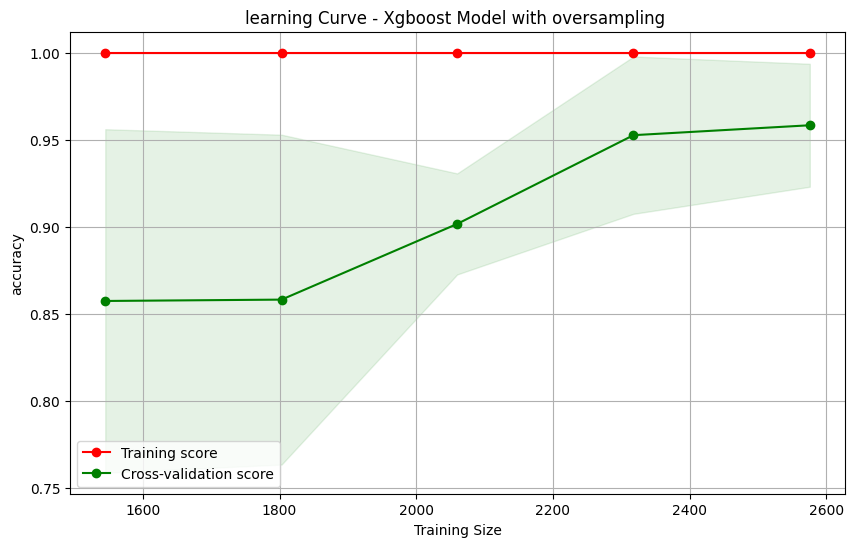

In [6]:
def plot_learning_curves(model, x, y, title):
    train_sizes, train_scores, val_scores = learning_curve(model, x, y, cv=3, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))#, shuffle=True, random_state=42

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training Size")
    plt.ylabel("accuracy")
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()
plot_learning_curves(xgBoost_model, X_train, y_train, "learning Curve - Xgboost Model with oversampling ")